    1. Package load
    2. Data load
    3. Data 탐색(EDA)
    4. 상관분석
    
    5. 결론 : 경기도 고양시 덕양구 ( 26253 )
       1) 오후 3시 이후 부터 다음날 오전 1시까지 많이 빌림
       2) 계절적 : 20대 7월,10월, 8월,6월 순 / 28주,29주차 순 
       3) 차종 : 경형 > 준중형 > 소형suv  / 2,3,4,5월 준중형, 그 외 경형
          - 경형: 31.554489 , 준중형: 27.916810, 소형SUV : 22.587895, 준중형SUV: 11.202529
       4) 토요일: 17.445625 , 일요일: 16.363844 .. 그외 13,12%
       5) term 제외 : 장기 렌트 제외 
          92%로 계산 :24094  ... 결과 다소 나음 
          나이 50대 이하 , 차종 4가지(경형, 준중형, 소형suv, 준준형suv) 계산 : 21414 (81.5%)


In [62]:
# pandas를 pd이름으로 호출
import requests
from io import BytesIO
from itertools import product
from datetime import datetime

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.ticker as plticker
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
import statsmodels.api as sm
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

plt.rc('font', family='NanumGothic')
plt.rcParams['font.size'] = 14
plt.rcParams["figure.figsize"] = (22,4)

In [63]:
# customer_lib_1.csv 파일을 불러와서 변수 customer_1 값으로 할당

df = pd.read_csv('../div_data/고양시 덕양구.csv')
df_final = pd.read_csv('../data/230119_final_join.csv')

In [64]:
df_final['region2'].unique()

array(['고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '광명시', '구리시', '김포시', '남양주시',
       '성남시 분당구', '성남시 수정구', '성남시 중원구', '안양시 동안구', '안양시 만안구', '양평군',
       '의정부시', '하남시', '화성시'], dtype=object)

In [65]:
#data 확인
df.head()

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model,r_week_day,s_week_day,is_weekend,r_weeknum,r_year,r_month,r_yyyyww,s_weeknum,s_year,s_month,s_yyyyww,date_term
0,경기도,고양시 덕양구,2019-07-19 00:53:41+00:00,2019-07-18 19:20:00+00:00,1,male,소형SUV,4,3,0,29,2019,2019-07,2019-29,29,2019,2019-07,2019-29,5.56
1,경기도,고양시 덕양구,2019-11-22 21:47:00+00:00,2019-11-22 05:00:00+00:00,3,male,경형,4,4,0,47,2019,2019-11,2019-47,47,2019,2019-11,2019-47,16.78
2,경기도,고양시 덕양구,2019-10-19 19:50:00+00:00,2019-10-19 07:20:00+00:00,1,female,경형,5,5,1,42,2019,2019-10,2019-42,42,2019,2019-10,2019-42,12.50
3,경기도,고양시 덕양구,2019-08-09 16:30:21+00:00,2019-08-09 12:40:00+00:00,3,female,경형,4,4,0,32,2019,2019-08,2019-32,32,2019,2019-08,2019-32,3.84
4,경기도,고양시 덕양구,2019-11-17 00:46:07+00:00,2019-11-15 22:40:00+00:00,1,male,준중형SUV,6,4,0,46,2019,2019-11,2019-46,46,2019,2019-11,2019-46,26.10


In [66]:
#EDA  ... 지역 확인
print("region1 : ",len(df['region1'].unique()))
print(df['region1'].unique())
print("region2 : ",len(df['region2'].unique()))
print(df['region2'].unique())
print(len(df))

region1 :  1
['경기도']
region2 :  1
['고양시 덕양구']
26253


In [67]:
df['index_int'] = ''

for i , value in enumerate(df['region1']):
    df['index_int'][i] = i


/tmp/ipykernel_48/3612480014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['index_int'][i] = i


In [68]:
df['reservation_return_hour3'] = ''
for i , value in enumerate(df['reservation_return_at']):
    temp = str(df['reservation_return_at'][i])
    df['reservation_return_hour3'][i] = temp[10:13]

/tmp/ipykernel_48/818228797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_return_hour3'][i] = temp[10:13]


In [69]:
#column 변경  : object > date 
df['reservation_return_at'] = pd.to_datetime(df['reservation_return_at'])
df['reservation_start_at'] = pd.to_datetime(df['reservation_start_at'])
df['gender'] = df['gender'].astype(str)
df['car_model'] = df['car_model'].astype(str)
df['region1'] = df['region1'].astype(str)
df['region2'] = df['region2'].astype(str)

In [70]:

df['reservation_return_date'] = df['reservation_return_at'].dt.to_period(freq = 'D')
df['reservation_start_date'] = df['reservation_start_at']. dt.to_period(freq = 'D')
df['reservation_return_hour'] = df['reservation_return_at'].dt.to_period(freq = 'H')
df['reservation_start_hour'] = df['reservation_start_at']. dt.to_period(freq = 'H')


/opt/conda/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [71]:
temp_hour = df['reservation_return_hour3'].value_counts().sort_index()

In [72]:
df_weekend = df[df['is_weekend'] == 1]  
print(len(df_weekend))
print(round(len(df_weekend)/len(df),2))
temp_weekend_hour = df_weekend['reservation_return_hour3'].value_counts().sort_index()

8876
0.34


In [73]:
df_weekday = df[df['is_weekend'] == 0]  
print(len(df_weekday))
print(round(len(df_weekday)/len(df),2))
temp_weekday_hour = df_weekday['reservation_return_hour3'].value_counts().sort_index()

17377
0.66


<AxesSubplot:>

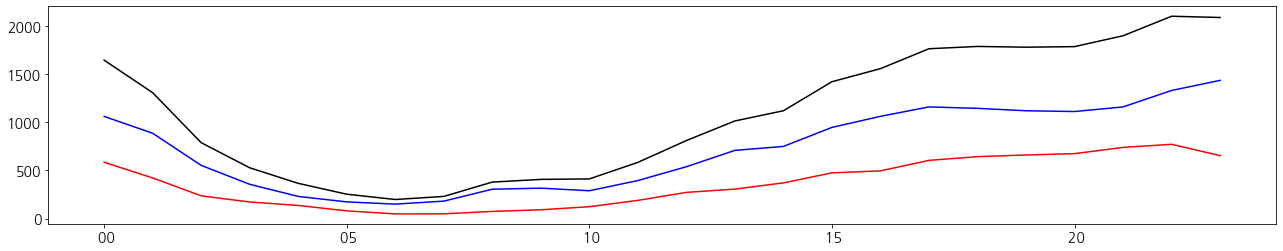

In [74]:
temp_hour.plot(color='black')
temp_weekday_hour.plot(color='blue')
temp_weekend_hour.plot(color='red')

In [75]:
print("s_month : ",len(df['s_month'].unique()))
print(df['s_month'].unique())
print(df['s_month'].value_counts().sort_index())

s_month :  13
['2019-07' '2019-11' '2019-10' '2019-08' '2019-05' '2019-06' '2019-01'
 '2019-09' '2019-03' '2019-04' '2019-02' '2018-12' '2019-12']
2018-12       5
2019-01    2056
2019-02    2067
2019-03    2185
2019-04    2140
2019-05    2465
2019-06    2571
2019-07    2583
2019-08    2558
2019-09    2455
2019-10    2646
2019-11    2495
2019-12      27
Name: s_month, dtype: int64


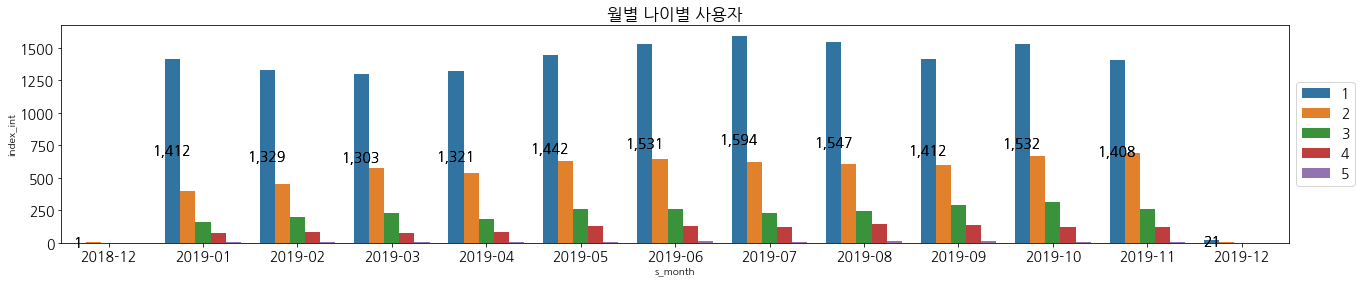

In [76]:
#EDA  ... 지역별 월별 사용자 확인(3) .. 지역 2
grouped = df.groupby([df['age_group'], df['s_month']]).count().sort_values(by='s_month')
ax = sns.barplot(data=grouped.reset_index(), x='s_month', y='index_int', hue='age_group')

containers = ax.containers[0]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
# plt.rcParams['font.size'] = 8
plt.title('월별 나이별 사용자')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# 20대 7월,10월, 8월,6월 순 

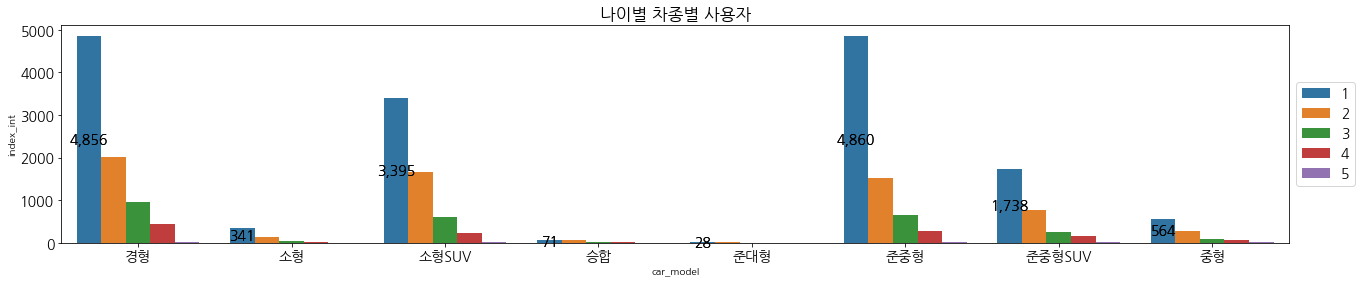

In [77]:
#EDA  ... 지역별 월별 사용자 확인(3) .. 지역 2
grouped = df.groupby([df['age_group'], df['car_model']]).count().sort_values(by='car_model')
ax = sns.barplot(data=grouped.reset_index(), x='car_model', y='index_int', hue='age_group')

containers = ax.containers[0]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
# plt.rcParams['font.size'] = 8
plt.title('나이별 차종별 사용자')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# 20대, 준중형, 경형, 소형suv  순

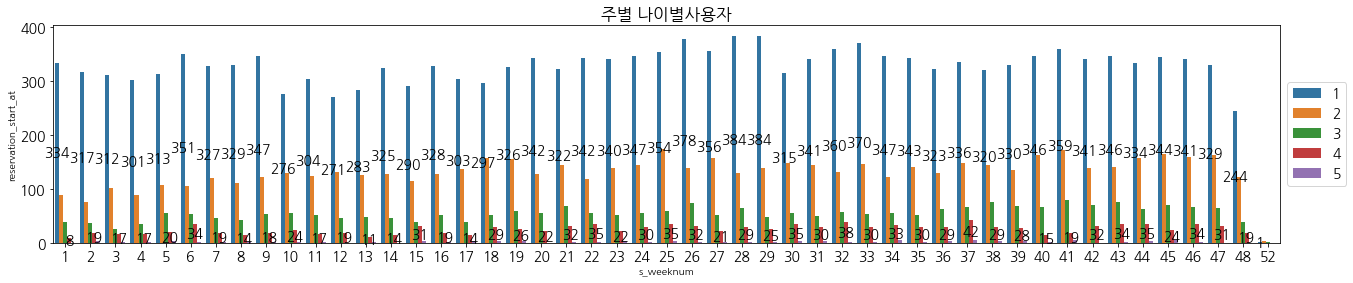

In [78]:
#EDA  ... 지역별 월별 사용자 확인(3) .. 지역 2
grouped = df.groupby([df['age_group'], df['s_weeknum']]).count().sort_values(by='s_weeknum')
ax = sns.barplot(data=grouped.reset_index(), x='s_weeknum', y='reservation_start_at', hue='age_group')

containers = ax.containers[-2]
containers0 = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
ax.bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
# plt.rcParams['font.size'] = 8
plt.title('주별 나이별사용자')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#20대 282ㅜ,29주차 순 

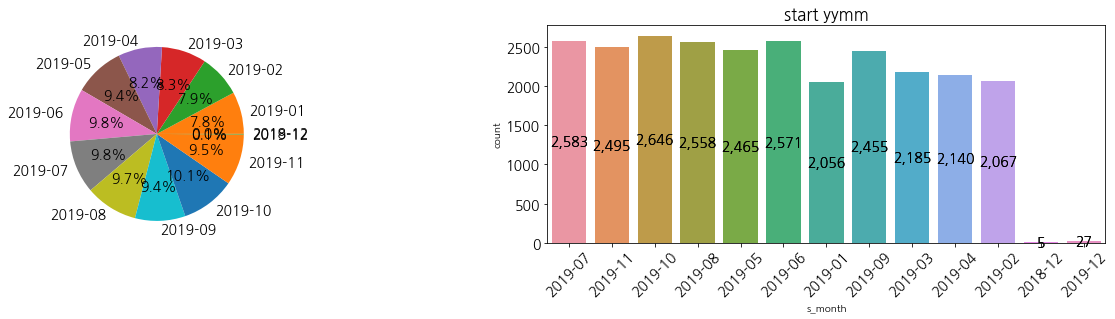

In [79]:
# axes[0].plot(x, y)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['s_month']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
# plt.title('지역별 사용자')

ax = sns.countplot(data=df, x='s_month')  #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('start yymm')
plt.xticks(rotation=45)
plt.show()
# 10월, 7월 순

In [80]:
print(df['age_group'].unique())
print(df['age_group'].value_counts()) # 1 : 20~29 세, 2 : 30~39 세, 3 : 40~49 세,- 4 : 50~59 세,- 5 : 60세 이상

[1 3 2 4 5]
1    15853
2     6433
3     2642
4     1220
5      105
Name: age_group, dtype: int64


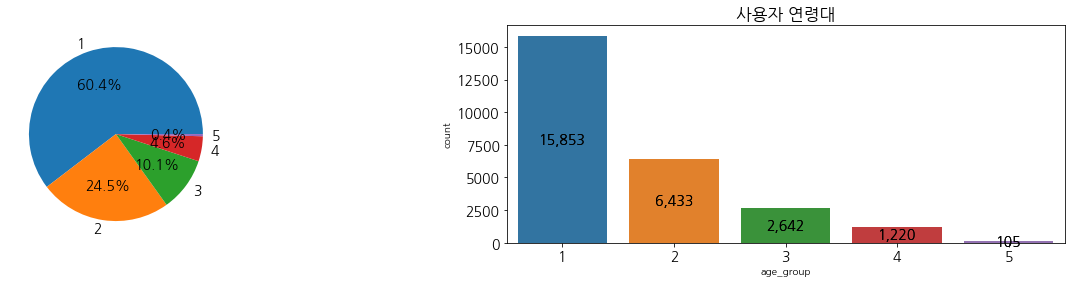

In [81]:
#EDA  ...사용자 연령대 (1)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['age_group']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('사용자 연령대')

ax = sns.countplot(data=df, x='age_group')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('사용자 연령대')
plt.show()

In [82]:
#EDA  ...사용자 연령대 (2)
print(df['gender'].unique())
print(df['gender'].value_counts()) # 1 : 20~29 세, 2 : 30~39 세, 3 : 40~49 세,- 4 : 50~59 세,- 6 : 60세 이상

['male' 'female' 'unknown']
male       20204
female      4966
unknown     1083
Name: gender, dtype: int64


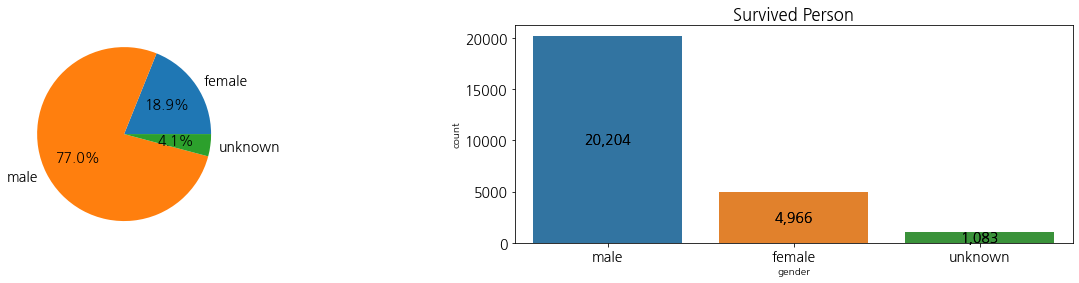

In [83]:
#EDA  ...사용자 성별(1)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['gender']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('지역별 사용자')

ax = sns.countplot(data=df, x='gender')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('Survived Person')
plt.show()

In [84]:
#EDA  ...차종별  ['경형' '준중형' 준중형SUV' '소형SUV' '소형' '준대형' '중형' ??? 중형SUV' '승합' '??수입' ??'대형']
print("car_model : ",len(df['car_model'].unique()))
print(df['car_model'].unique().sort())
print(df['car_model'].value_counts()) 

car_model :  8
None
경형        8284
준중형       7329
소형SUV     5930
준중형SUV    2941
중형        1000
소형         546
승합         176
준대형         47
Name: car_model, dtype: int64


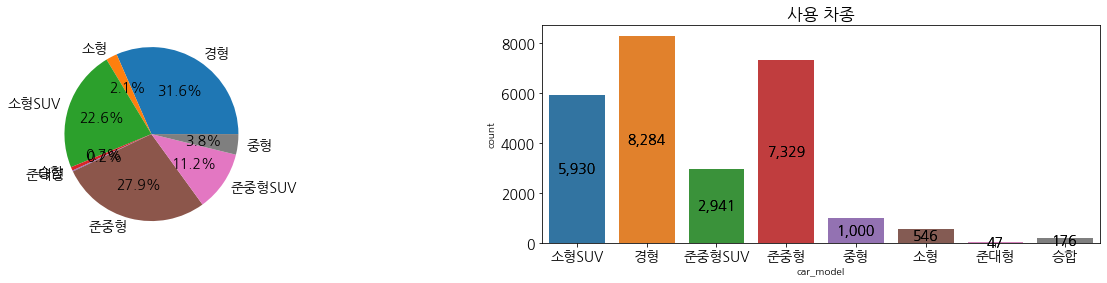

In [85]:
#EDA  ...차종별(1)
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,4)

pie_data = df.groupby(['car_model']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('사용 차종')

ax = sns.countplot(data=df, x='car_model')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('사용 차종')
plt.show()

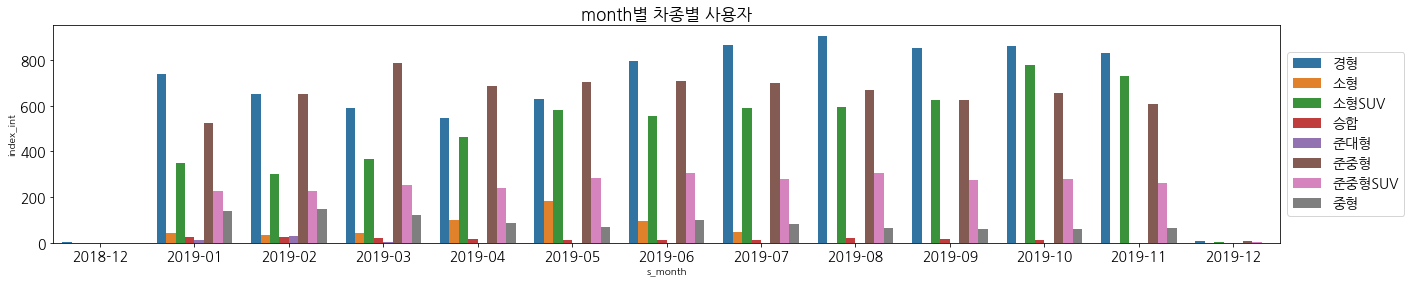

In [86]:
#EDA  ...차종별(1)  ..+지역별
grouped = df['index_int'].groupby([df['region2'], df['car_model'],df['s_month']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='s_month', y='index_int', hue='car_model')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('month별 차종별 사용자')
# plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#2,3,4,5 준중형, 그 외 경형

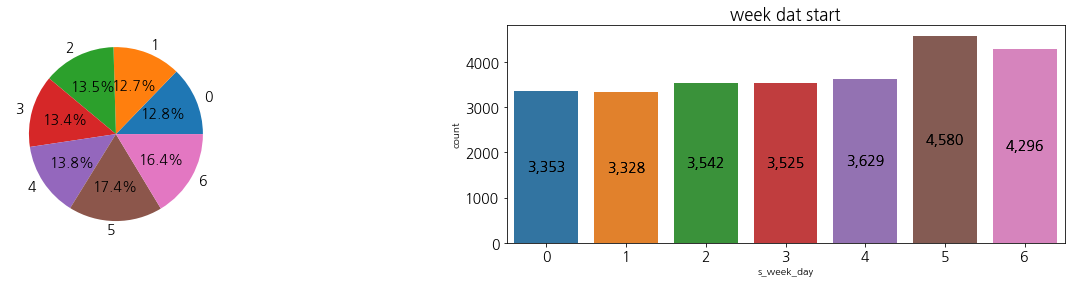

In [87]:
#EDA  ...weekday(1)  0 월요일 .... 6 일요일
fig, axes = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (22,6)
plt.rc('figure', titlesize=12)
plt.rc('axes', labelsize=10) 

pie_data = df.groupby(['s_week_day']).count().region2
axes[0].pie(pie_data, labels=pie_data.index, autopct = '%1.1f%%')
plt.title('week dat start')

ax = sns.countplot(data=df, x='s_week_day')   #x축 라벨

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')
plt.title('week dat start')
plt.show()

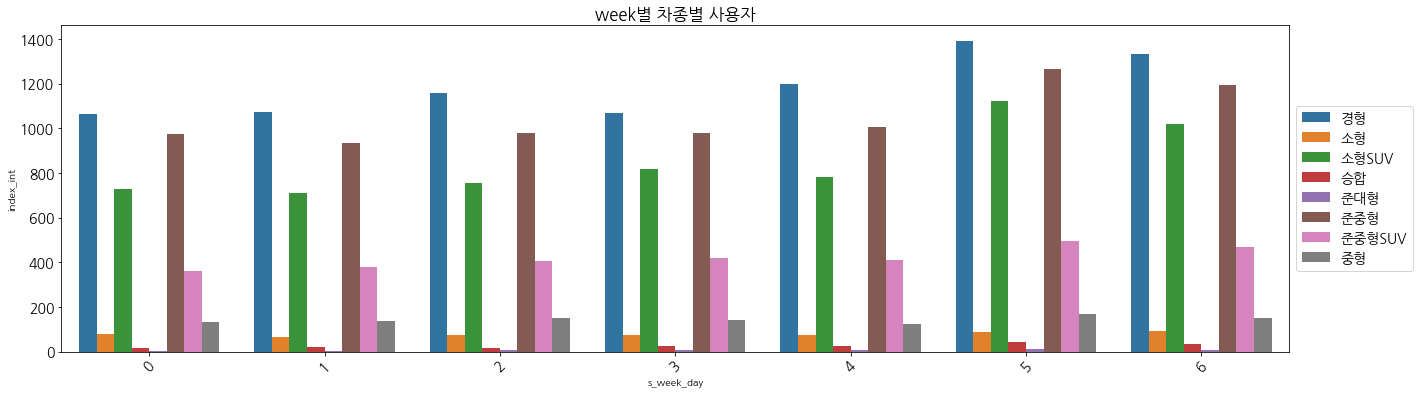

In [88]:
#EDA  ...차종별(1)  ..+지역별2
grouped = df['index_int'].groupby([df['s_week_day'], df['car_model']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='s_week_day', y='index_int', hue='car_model')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 차종별 사용자')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#경형, > 준중형 > 소형suv

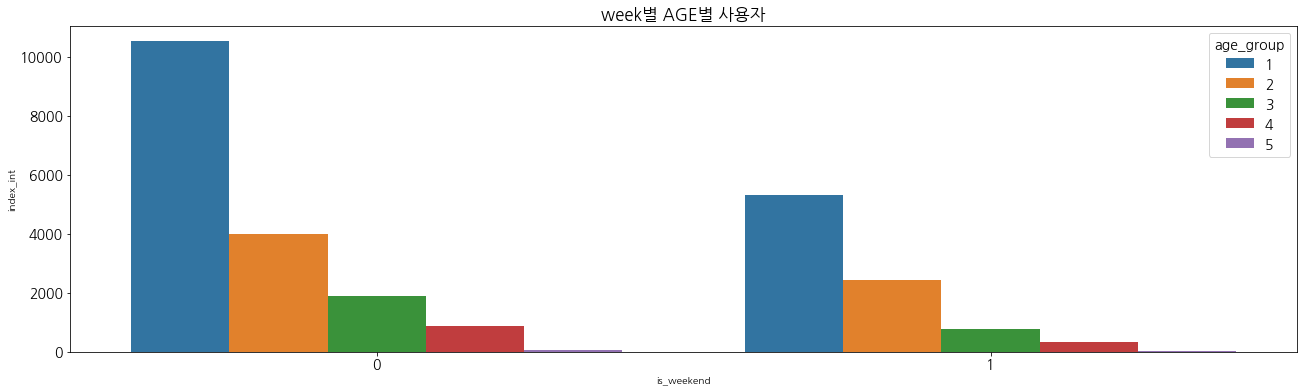

In [89]:
#EDA  ...weekday(1) + 지역
grouped = df['index_int'].groupby([df['is_weekend'],df['age_group']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='is_weekend', y='index_int', hue='age_group')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 AGE별 사용자')
# plt.xticks(rotation=45)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


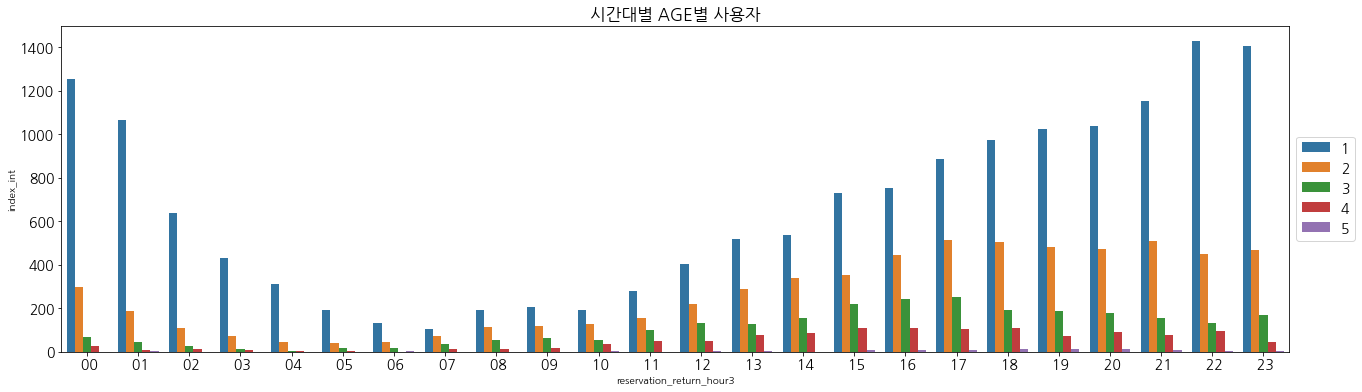

In [90]:
#EDA  ...weekday(1) + 지역
grouped = df['index_int'].groupby([df['reservation_return_hour3'],df['age_group']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='reservation_return_hour3', y='index_int', hue='age_group')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('시간대별 AGE별 사용자')
# plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#오후 3시 이후 많이 빌림

In [91]:
df['reservation_return_hour3'].value_counts().sort_index()

 00    1647
 01    1309
 02     789
 03     528
 04     366
 05     253
 06     198
 07     230
 08     379
 09     407
 10     412
 11     584
 12     811
 13    1015
 14    1121
 15    1423
 16    1559
 17    1766
 18    1790
 19    1782
 20    1788
 21    1901
 22    2104
 23    2091
Name: reservation_return_hour3, dtype: int64

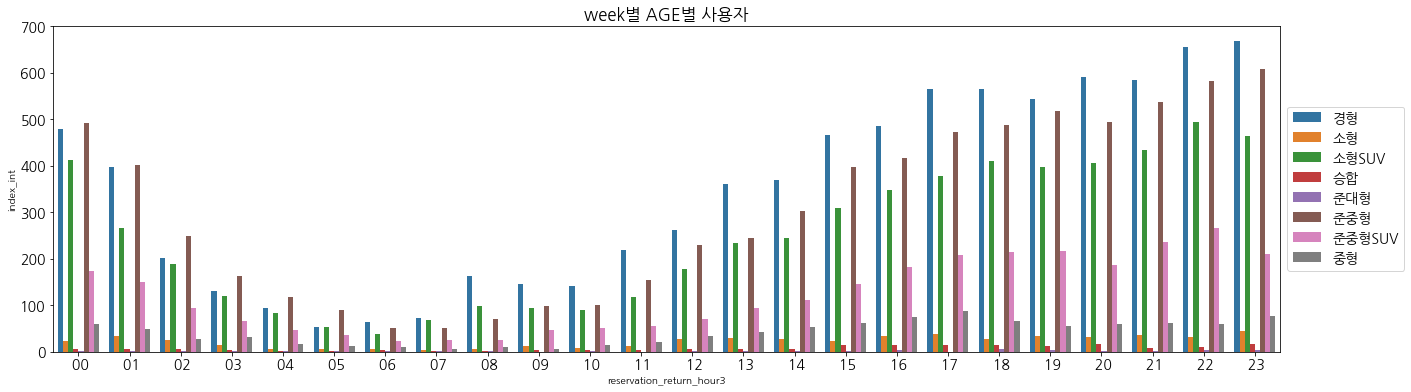

In [92]:
#EDA  ...weekday(1) + 지역
grouped = df['index_int'].groupby([df['reservation_return_hour3'],df['car_model']]).count()
ax = sns.barplot(data=grouped.reset_index(), x='reservation_return_hour3', y='index_int', hue='car_model')

containers = ax.containers[-1]
containers0 = ax.containers[0]
axes[1].bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
axes[1].bar_label(containers0, labels=[f'{x:,.0f}' for x in containers0.datavalues], label_type='center')

plt.title('week별 AGE별 사용자')
# plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#부산은 화요일....

상관분석---------------------------------------------------------------------------------------------------------------------------

In [93]:
df1 = df

In [94]:
df1.head()

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model,r_week_day,s_week_day,is_weekend,...,s_year,s_month,s_yyyyww,date_term,index_int,reservation_return_hour3,reservation_return_date,reservation_start_date,reservation_return_hour,reservation_start_hour
0,경기도,고양시 덕양구,2019-07-19 00:53:41+00:00,2019-07-18 19:20:00+00:00,1,male,소형SUV,4,3,0,...,2019,2019-07,2019-29,5.56,0,00,2019-07-19,2019-07-18,2019-07-19 00:00,2019-07-18 19:00
1,경기도,고양시 덕양구,2019-11-22 21:47:00+00:00,2019-11-22 05:00:00+00:00,3,male,경형,4,4,0,...,2019,2019-11,2019-47,16.78,1,21,2019-11-22,2019-11-22,2019-11-22 21:00,2019-11-22 05:00
2,경기도,고양시 덕양구,2019-10-19 19:50:00+00:00,2019-10-19 07:20:00+00:00,1,female,경형,5,5,1,...,2019,2019-10,2019-42,12.50,2,19,2019-10-19,2019-10-19,2019-10-19 19:00,2019-10-19 07:00
3,경기도,고양시 덕양구,2019-08-09 16:30:21+00:00,2019-08-09 12:40:00+00:00,3,female,경형,4,4,0,...,2019,2019-08,2019-32,3.84,3,16,2019-08-09,2019-08-09,2019-08-09 16:00,2019-08-09 12:00
4,경기도,고양시 덕양구,2019-11-17 00:46:07+00:00,2019-11-15 22:40:00+00:00,1,male,준중형SUV,6,4,0,...,2019,2019-11,2019-46,26.10,4,00,2019-11-17,2019-11-15,2019-11-17 00:00,2019-11-15 22:00


In [95]:
my_map = {
    "male": "1",
    "female": "0",
    "unknown":"2"
}

In [96]:
df1["gender"] = df1["gender"].map(my_map)

In [97]:
print(df1["gender"].value_counts())
print((df1["gender"].value_counts() / df1["gender"].count())*100)

1    20204
0     4966
2     1083
Name: gender, dtype: int64
1    76.958824
0    18.915933
2     4.125243
Name: gender, dtype: float64


In [98]:
my_map2 = {
    '경형':'1',
    '준중형':'2',
    '준중형SUV':'3',
    '소형SUV':'4',
    '소형':'5',
    '준대형':'6',
    '중형': '7',
    '중형SUV':'8',
    '승합':'9',
    '수입':'10',
    '대형':'11'
}

In [99]:
df1["car_model"] = df1["car_model"].map(my_map2)

In [100]:
print(df1["car_model"].value_counts().sort_index())
print((df1["car_model"].value_counts() / df1["car_model"].count())*100)

1    8284
2    7329
3    2941
4    5930
5     546
6      47
7    1000
9     176
Name: car_model, dtype: int64
1    31.554489
2    27.916810
4    22.587895
3    11.202529
7     3.809088
5     2.079762
9     0.670400
6     0.179027
Name: car_model, dtype: float64


In [101]:
print(df1['s_week_day'].value_counts().sort_index())
print((df1["s_week_day"].value_counts() / df1["s_week_day"].count())*100)

0    3353
1    3328
2    3542
3    3525
4    3629
5    4580
6    4296
Name: s_week_day, dtype: int64
5    17.445625
6    16.363844
4    13.823182
2    13.491791
3    13.427037
0    12.771874
1    12.676646
Name: s_week_day, dtype: float64


In [102]:
print(df1['date_term'].unique())
print(len(df1['date_term'].unique()))

[ 5.56 16.78 12.5  ... 24.45 20.47 58.14]
3116


In [103]:
# 
df1['term_normal'] = df1["date_term"].apply(lambda x : round((x - df1['date_term'].min()) / (df1['date_term'].max() - df1['date_term'].min()),3) )

In [104]:
df1.describe()

,age_group,r_week_day,s_week_day,is_weekend,r_weeknum,r_year,s_weeknum,s_year,date_term,term_normal
count,26253.000000,26253.000000,26253.000000,26253.000000,26253.000000,26253.0,26253.000000,26253.000000,26253.000000,26253.000000
mean,1.601722,3.235859,3.206453,0.338095,25.426580,2019.0,25.404182,2018.999810,6.792355,0.020509
std,0.876227,2.029622,2.014395,0.473070,13.598599,0.0,13.599463,0.013799,11.264374,0.033992
min,1.000000,0.000000,0.000000,0.000000,1.000000,2019.0,1.000000,2018.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,14.000000,2019.0,14.000000,2019.000000,1.910000,0.006000
50%,1.000000,3.000000,3.000000,0.000000,26.000000,2019.0,26.000000,2019.000000,3.720000,0.011000
75%,2.000000,5.000000,5.000000,1.000000,37.000000,2019.0,37.000000,2019.000000,6.760000,0.020000
max,5.000000,6.000000,6.000000,1.000000,48.000000,2019.0,52.000000,2019.000000,331.330000,1.000000


<AxesSubplot:xlabel='date_term', ylabel='Density'>

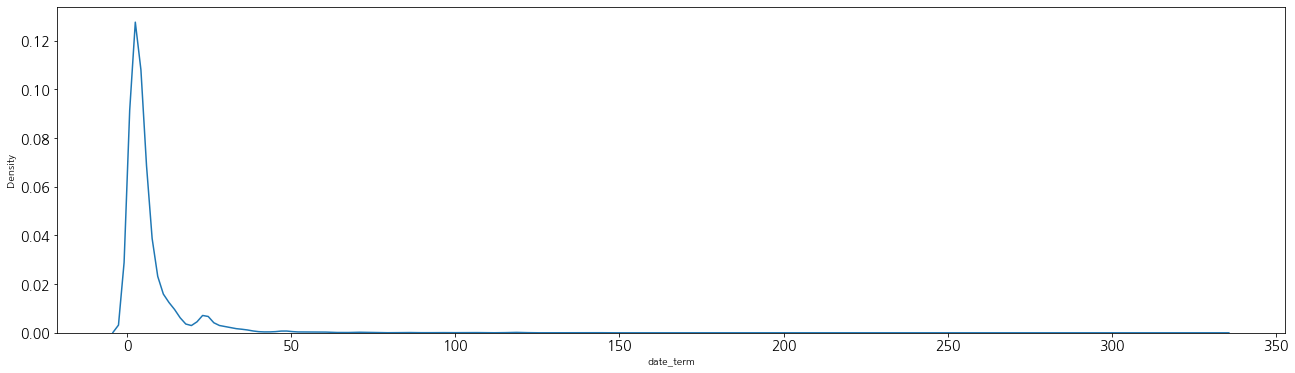

In [105]:
sns.kdeplot(df1['date_term'])

In [106]:
df1['gender'] = df1['gender'].astype(int)
df1['car_model'] = df1['car_model'].astype(int)

In [107]:
df1.describe()

,age_group,gender,car_model,r_week_day,s_week_day,is_weekend,r_weeknum,r_year,s_weeknum,s_year,date_term,term_normal
count,26253.000000,26253.000000,26253.000000,26253.000000,26253.000000,26253.000000,26253.000000,26253.0,26253.000000,26253.000000,26253.000000,26253.000000
mean,1.601722,0.852093,2.555175,3.235859,3.206453,0.338095,25.426580,2019.0,25.404182,2018.999810,6.792355,0.020509
std,0.876227,0.456665,1.587310,2.029622,2.014395,0.473070,13.598599,0.0,13.599463,0.013799,11.264374,0.033992
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2019.0,1.000000,2018.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,14.000000,2019.0,14.000000,2019.000000,1.910000,0.006000
50%,1.000000,1.000000,2.000000,3.000000,3.000000,0.000000,26.000000,2019.0,26.000000,2019.000000,3.720000,0.011000
75%,2.000000,1.000000,4.000000,5.000000,5.000000,1.000000,37.000000,2019.0,37.000000,2019.000000,6.760000,0.020000
max,5.000000,2.000000,9.000000,6.000000,6.000000,1.000000,48.000000,2019.0,52.000000,2019.000000,331.330000,1.000000


In [108]:
df2 = df1[['age_group', 'gender','car_model','r_week_day','s_week_day', 
           'is_weekend','r_weeknum','s_weeknum','date_term','term_normal']]

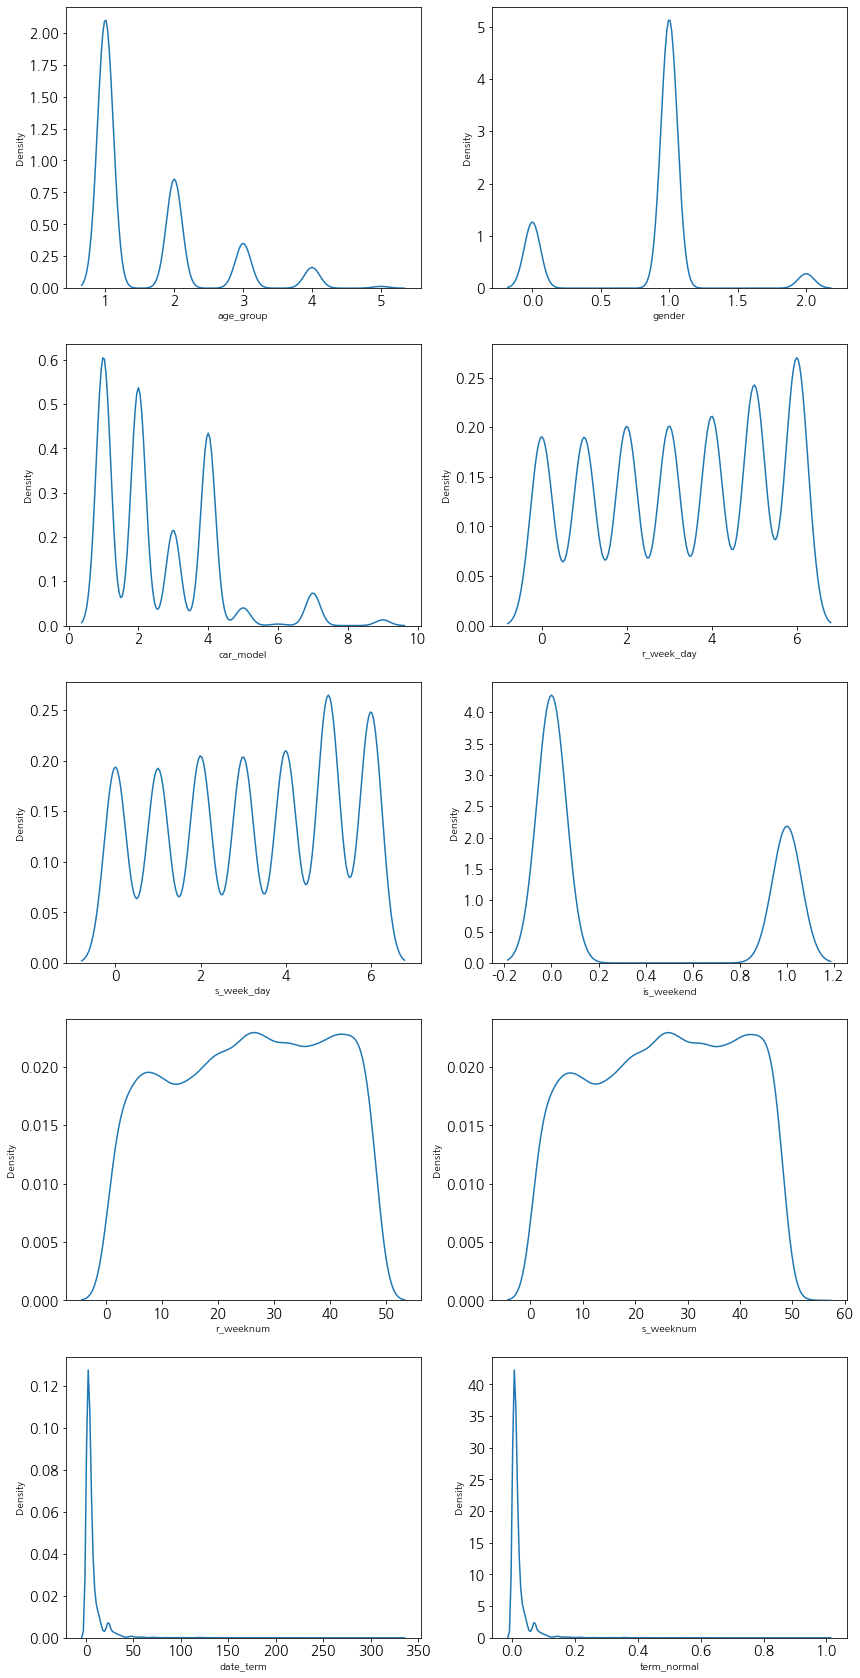

In [109]:
# 5) data 호가인 grapes ............... 중요 log변환  
# 아래거 하 ㄴ후 다시
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(5, 2, figsize=(14, 30))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

# id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
count = 0
columns = df2.columns
for row in range(5):
    for col in range(2):
        sns.kdeplot(df2[columns[count]], ax=ax[row][col])
        #ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 10:
            break

In [110]:
len(df1)

26253

In [111]:
# # 이상치 확인 : Pclass 이상치 없음(95% 수준), age(95% 초과 : 69개  )
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index

In [112]:
outlier_df = df1.loc[outlier(df1, 'date_term', 1)]   #2=95, 1 =68%
outlier_df.reset_index(drop=True)
print(len(outlier_df))
print(round(len(outlier_df)/len(df1),2))


24094
0.92


In [113]:
# outlier_df = outlier_df.loc[outlier(outlier_df, 'age_group', 2)]
# len(outlier_df)

In [114]:
# outlier_df = outlier_df.loc[outlier(outlier_df, 'car_model', 2)]
# len(outlier_df)

In [115]:
# outlier_df = outlier_df.loc[outlier(outlier_df, 's_weeknum', 2)]
# len(outlier_df)

In [116]:
df1.head()

,region1,region2,reservation_return_at,reservation_start_at,age_group,gender,car_model,r_week_day,s_week_day,is_weekend,...,s_month,s_yyyyww,date_term,index_int,reservation_return_hour3,reservation_return_date,reservation_start_date,reservation_return_hour,reservation_start_hour,term_normal
0,경기도,고양시 덕양구,2019-07-19 00:53:41+00:00,2019-07-18 19:20:00+00:00,1,1,4,4,3,0,...,2019-07,2019-29,5.56,0,00,2019-07-19,2019-07-18,2019-07-19 00:00,2019-07-18 19:00,0.017
1,경기도,고양시 덕양구,2019-11-22 21:47:00+00:00,2019-11-22 05:00:00+00:00,3,1,1,4,4,0,...,2019-11,2019-47,16.78,1,21,2019-11-22,2019-11-22,2019-11-22 21:00,2019-11-22 05:00,0.051
2,경기도,고양시 덕양구,2019-10-19 19:50:00+00:00,2019-10-19 07:20:00+00:00,1,0,1,5,5,1,...,2019-10,2019-42,12.50,2,19,2019-10-19,2019-10-19,2019-10-19 19:00,2019-10-19 07:00,0.038
3,경기도,고양시 덕양구,2019-08-09 16:30:21+00:00,2019-08-09 12:40:00+00:00,3,0,1,4,4,0,...,2019-08,2019-32,3.84,3,16,2019-08-09,2019-08-09,2019-08-09 16:00,2019-08-09 12:00,0.012
4,경기도,고양시 덕양구,2019-11-17 00:46:07+00:00,2019-11-15 22:40:00+00:00,1,1,3,6,4,0,...,2019-11,2019-46,26.10,4,00,2019-11-17,2019-11-15,2019-11-17 00:00,2019-11-15 22:00,0.079


In [117]:
def arima_sarima(data):
    print('ARIMA')
    df_function = pd.DataFrame(data['reservation_start_date'].value_counts())
    df_function.reset_index(inplace = True)
    df_function.columns = ['Date', 'Demand']
    df_function.sort_values(by = ['Date'], inplace = True)
    df_function['Date'] = df_function['Date'].astype(str)

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))  
    plt.plot(df_function['Date'], df_function['Demand'])
    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 30.0) 
    ax.xaxis.set_major_locator(loc)
    plt.show()

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))  
    plt.plot(df_function['Date'][0:100], df_function['Demand'][0:100], "b.-")
    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 7.0) 
    ax.xaxis.set_major_locator(loc)
    plt.show()

    df_function['Date'] = pd.to_datetime(df_function['Date'])
    df_function.set_index('Date', inplace = True)

    demand_rate = df_function['Demand']
    STL_decomposed = STL(demand_rate, seasonal = 7, period = 7).fit()
    fig = STL_decomposed.plot()
    fig.set_size_inches(10, 16)

    for ax in fig.axes :
        loc = plticker.MultipleLocator(base = 30.0) 
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_minor_locator(loc)
        ax.tick_params(axis='x', labelrotation = 45)
    
    plt.show()
    print(STL_decomposed.resid[STL_decomposed.resid > 0.1])

    demand_rate_replace = demand_rate.copy()
    demand_rate_replace[STL_decomposed.resid>0.1] = np.NaN
    demand_rate_replace = demand_rate_replace.interpolate(method='linear') 

    STL_decomposed_replace = STL(demand_rate_replace, seasonal = 7, period = 7).fit()
    fig = STL_decomposed_replace.plot()
    fig.set_size_inches(10, 16)

    for ax in fig.axes :
        loc = plticker.MultipleLocator(base = 30.0) 
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_minor_locator(loc)
        ax.tick_params(axis='x', labelrotation = 45)
    
    plt.show()
    print(STL_decomposed_replace.resid[STL_decomposed_replace.resid > 0.1])    

    plot_acf(demand_rate_replace)
    plot_pacf(demand_rate_replace, method="ywm")
    plt.show()

    demand_rate_diff = demand_rate_replace.diff(7).dropna()
    plot_acf(demand_rate_diff)
    plot_pacf(demand_rate_diff, method="ywm")
    plt.show()

    demand_rate_diff = pd.DataFrame(demand_rate_diff)
    demand_rate_diff.columns = ['Diff']

    p_value = adfuller(demand_rate_diff.reset_index().Diff)[1]
    print(f'p-value of ADF test (diff 7): {p_value}')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    plt.plot(demand_rate_diff.reset_index().Diff);
    plt.show()

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    plt.plot(demand_rate_diff.reset_index().Diff[0:100], "b.-")
    plt.show()

    arima_rate_train = demand_rate_diff[demand_rate_diff.index<'2019-09-08']
    arima_rate_test = demand_rate_diff[demand_rate_diff.index>='2019-09-08']
    model = sm.tsa.arima.ARIMA(arima_rate_train, order=(3, 1, 1))  
    fitted_m = model.fit()  
    print(fitted_m.summary())

    plot_predict(fitted_m)
    plt.show()

    fc = fitted_m.forecast(len(arima_rate_test), alpha = 0.05)  

    arima_rmse = np.sqrt(sklearn.metrics.mean_squared_error(arima_rate_test, fc))
    print(f'Test RMSE: {arima_rmse}\n')

    fc_series = pd.Series(fc, index = arima_rate_test.index)   

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))

    plt.plot(arima_rate_train, alpha = 0.5, color = 'black', label = 'training')
    plt.plot(arima_rate_test, alpha = 0.5, color = 'red', label = 'actual operation rate')
    plt.plot(fc_series, alpha = 0.5, color = 'blue', label = 'predicted operation rate')
    plt.legend()

    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 30.0) 
    ax.xaxis.set_major_locator(loc)

    plt.show()

    print('\n\n\n\nSARIMA')
    model_auto_arima = pm.auto_arima(arima_rate_train, seasonal = True, m = 7, D = 1) 
    print(model_auto_arima)
    print(model_auto_arima.params())
    print(model_auto_arima.aic())

    sarima_rate_pred, conf_int = model_auto_arima.predict(n_periods = arima_rate_test.shape[0], return_conf_int = True)
    sarima_rmse = np.sqrt(sklearn.metrics.mean_squared_error(arima_rate_test, sarima_rate_pred))
    print(f'Test RMSE: {sarima_rmse}\n')

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
    plt.xticks(rotation = 45)
    loc = plticker.MultipleLocator(base = 7.0) 
    ax.xaxis.set_major_locator(loc)

    plt.plot(arima_rate_train[-50:], alpha = 0.5, color = 'black', label = 'training')
    plt.plot(arima_rate_test, alpha = 0.5, color = 'red', label = 'actual operation rate')
    plt.plot(arima_rate_test.index.values, sarima_rate_pred, alpha = 0.5, color = 'blue', label = 'predicted operation rate')
    plt.fill_between(arima_rate_test.index.values, conf_int[:, 0], conf_int[:, 1], alpha = 0.1, color = 'b') 
    plt.legend()
    plt.show()

    model_auto_arima.plot_diagnostics(figsize=(10, 10))
    plt.show()

ARIMA


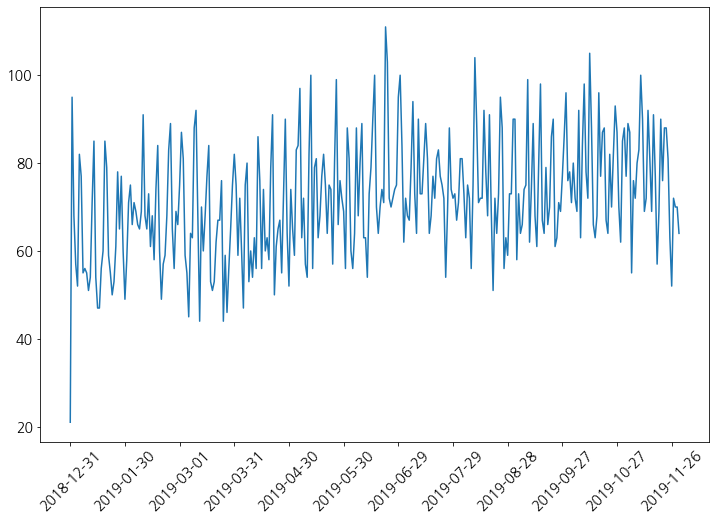

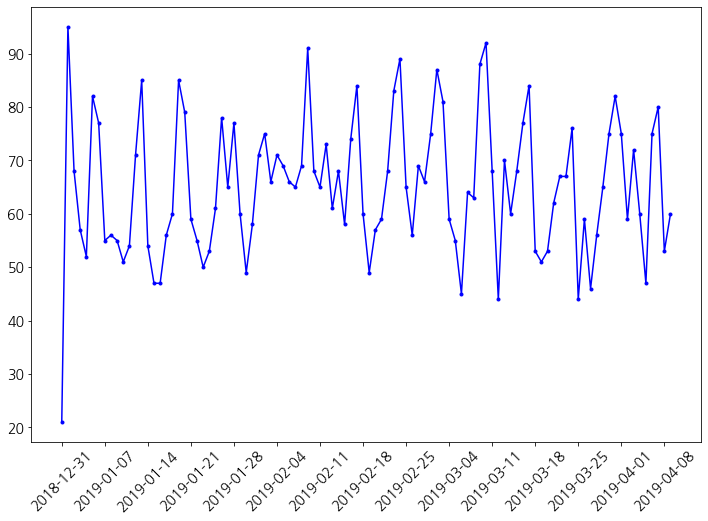

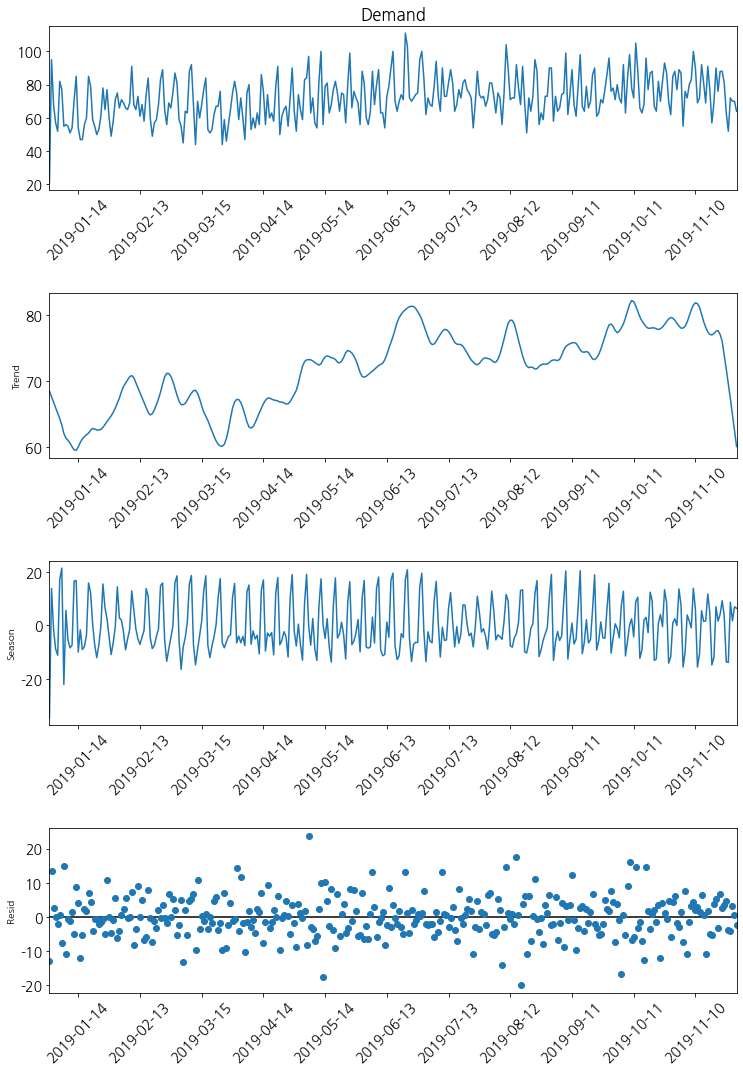

Date
2019-01-01    13.532088
2019-01-02     2.690426
2019-01-05     0.604913
2019-01-07    15.064962
2019-01-11     1.310986
                ...    
2019-11-23     2.674013
2019-11-24     3.376311
2019-11-25     4.805585
2019-11-28     3.325717
2019-11-29     0.476536
Name: resid, Length: 158, dtype: float64


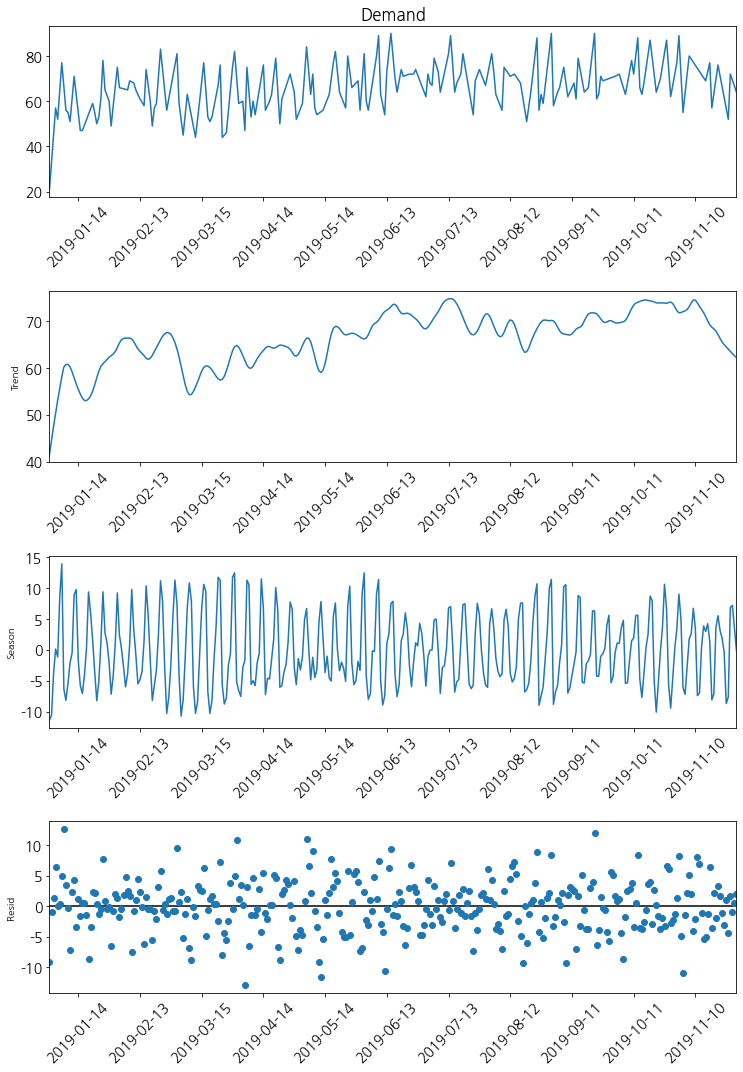

Date
2019-01-02     1.281475
2019-01-03     6.500175
2019-01-05     0.320003
2019-01-06     4.930232
2019-01-07    12.622401
                ...    
2019-11-22     1.745961
2019-11-25     0.983175
2019-11-27     1.617376
2019-11-29     0.606124
2019-11-30     1.963049
Name: resid, Length: 171, dtype: float64


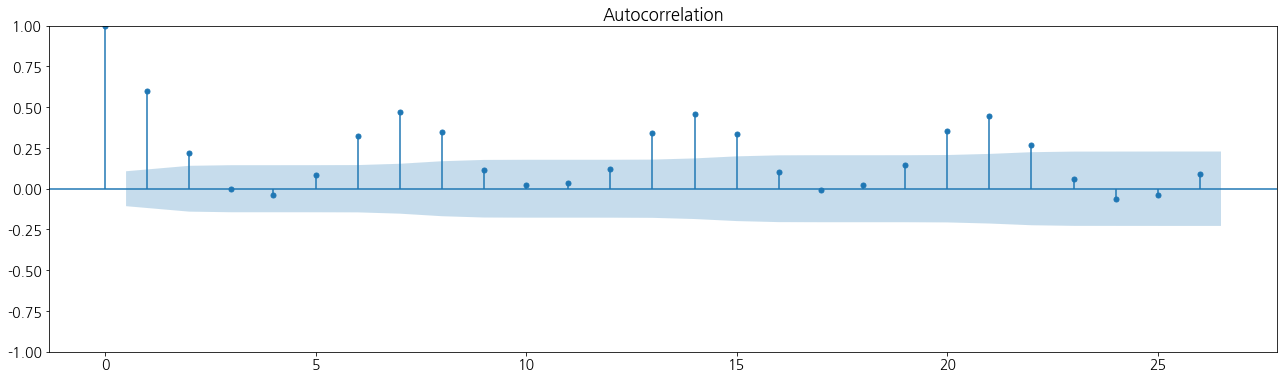

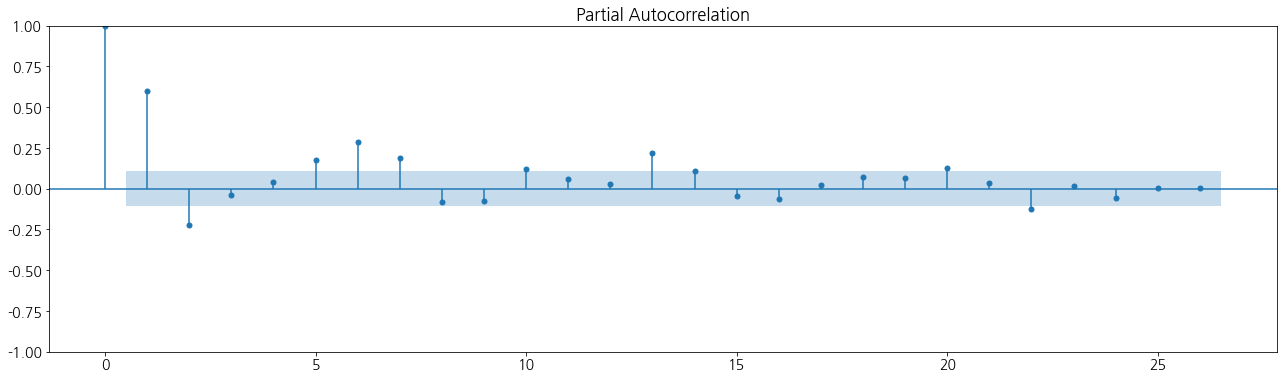

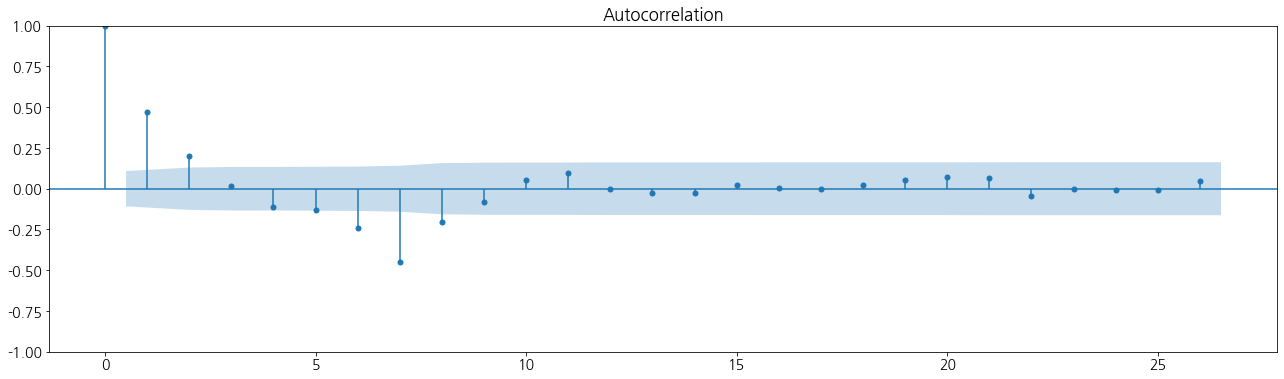

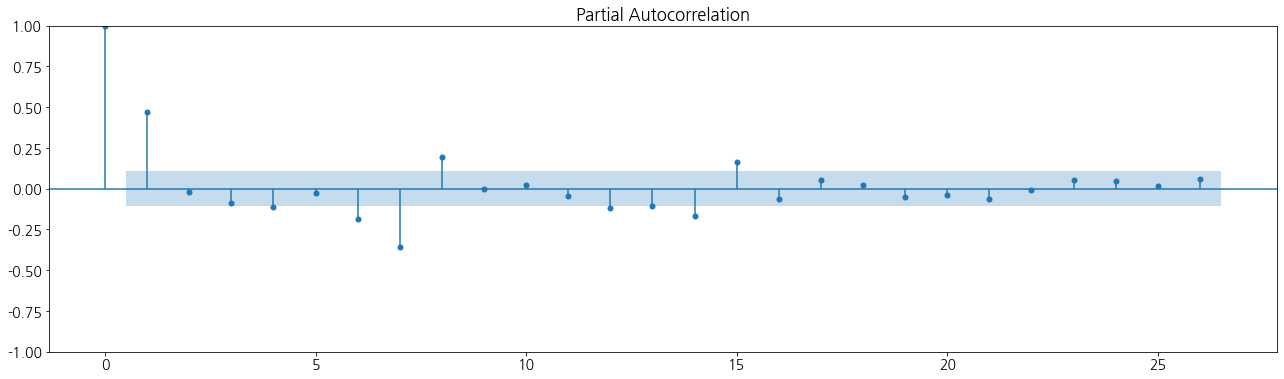

p-value of ADF test (diff 7): 2.435376918854945e-07


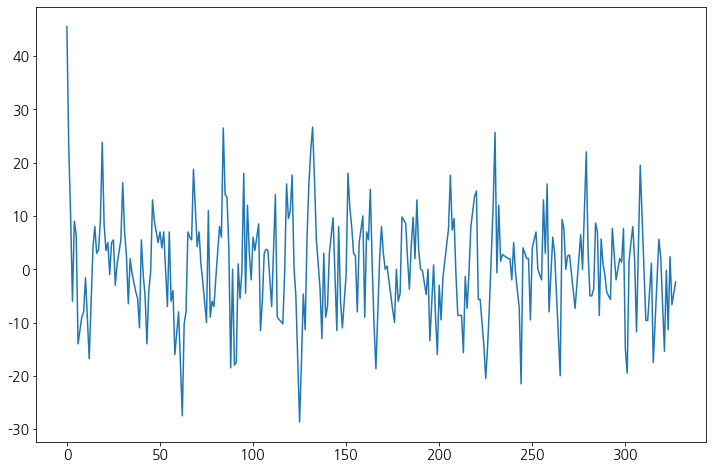

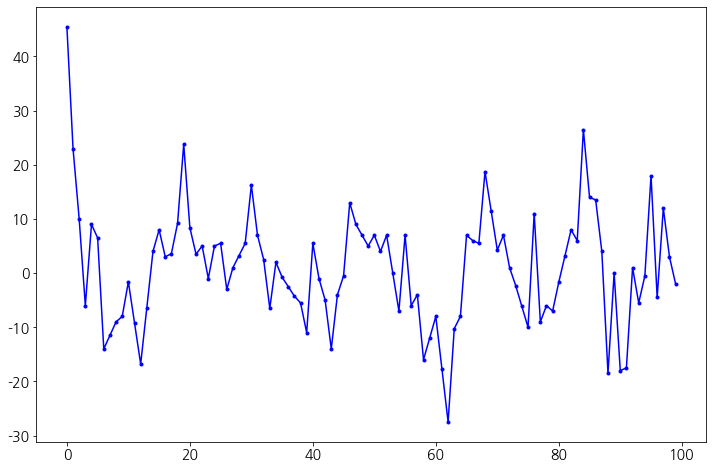

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                  244
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -863.809
Date:                Tue, 24 Jan 2023   AIC                           1737.617
Time:                        12:27:21   BIC                           1755.083
Sample:                    01-07-2019   HQIC                          1744.652
                         - 09-07-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5661      0.060      9.473      0.000       0.449       0.683
ar.L2          0.0782      0.076      1.030      0.303      -0.071       0.227
ar.L3         -0.1214      0.064     -1.906      0.0

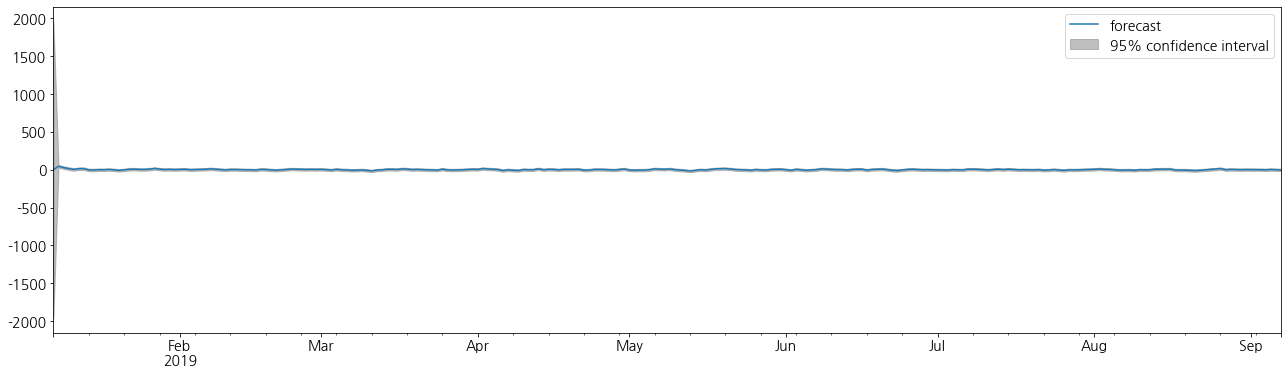

Test RMSE: 8.174859538413727



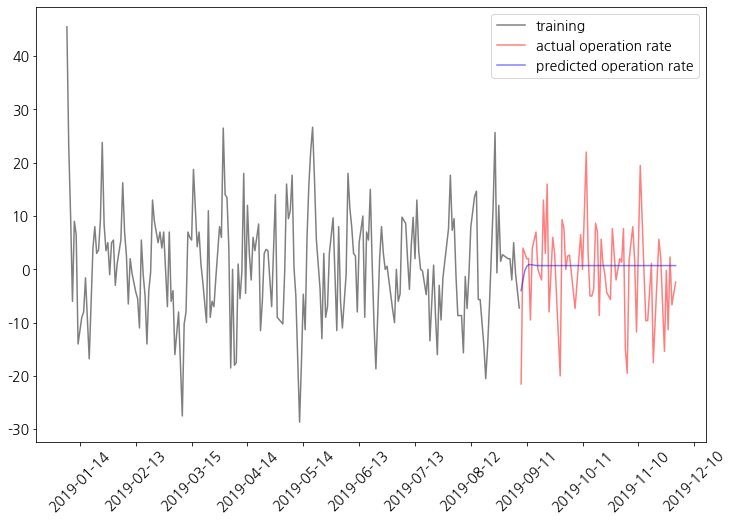





SARIMA
 ARIMA(2,0,1)(2,1,0)[7] intercept
[-1.23550158e-02  1.50747178e+00 -6.00096146e-01 -9.88119061e-01
 -9.72951197e-01 -5.23858001e-01  7.44988684e+01]
1725.179776690999
Test RMSE: 9.342579577329756



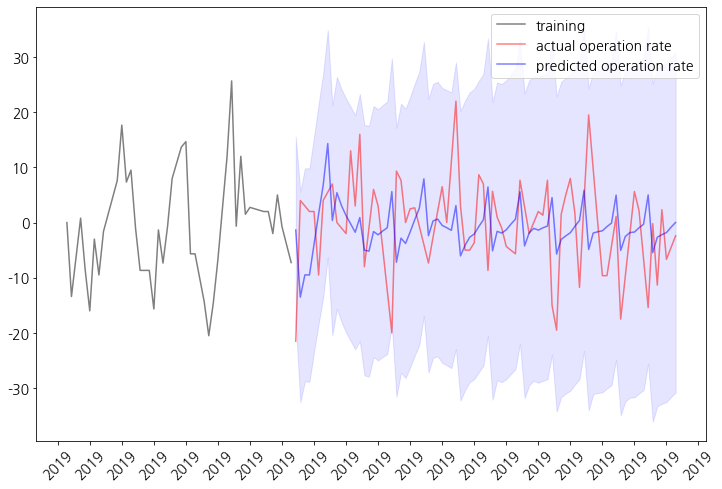

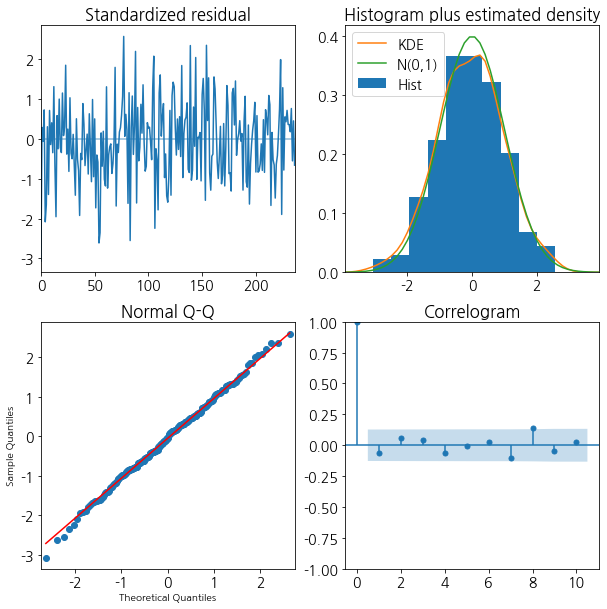

In [118]:
arima_sarima(outlier_df)

In [119]:
#age_group 제외
age1_df1 = outlier_df[outlier_df['age_group'] <= 3]
print(len(age1_df1))
car_df1 = age1_df1[age1_df1['car_model'] <= 4]
print(len(car_df1))
# age1_df1 = age1_df1.loc[outlier(age1_df1, 'age_group', 2)]
# print(len(age1_df1))

22886
21414


ARIMA


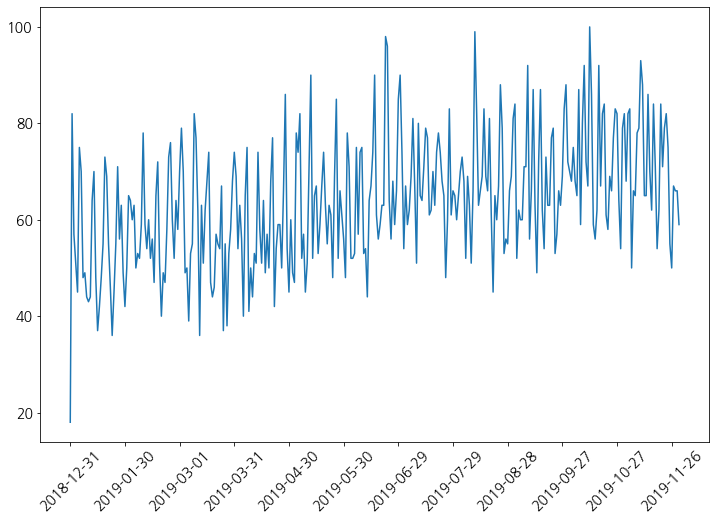

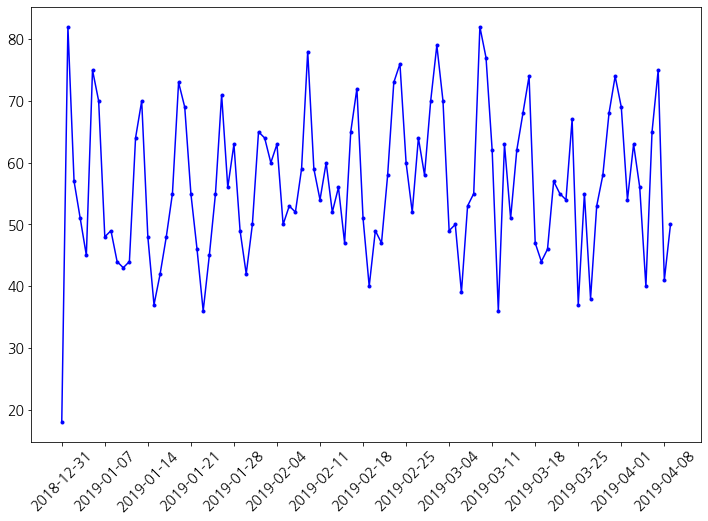

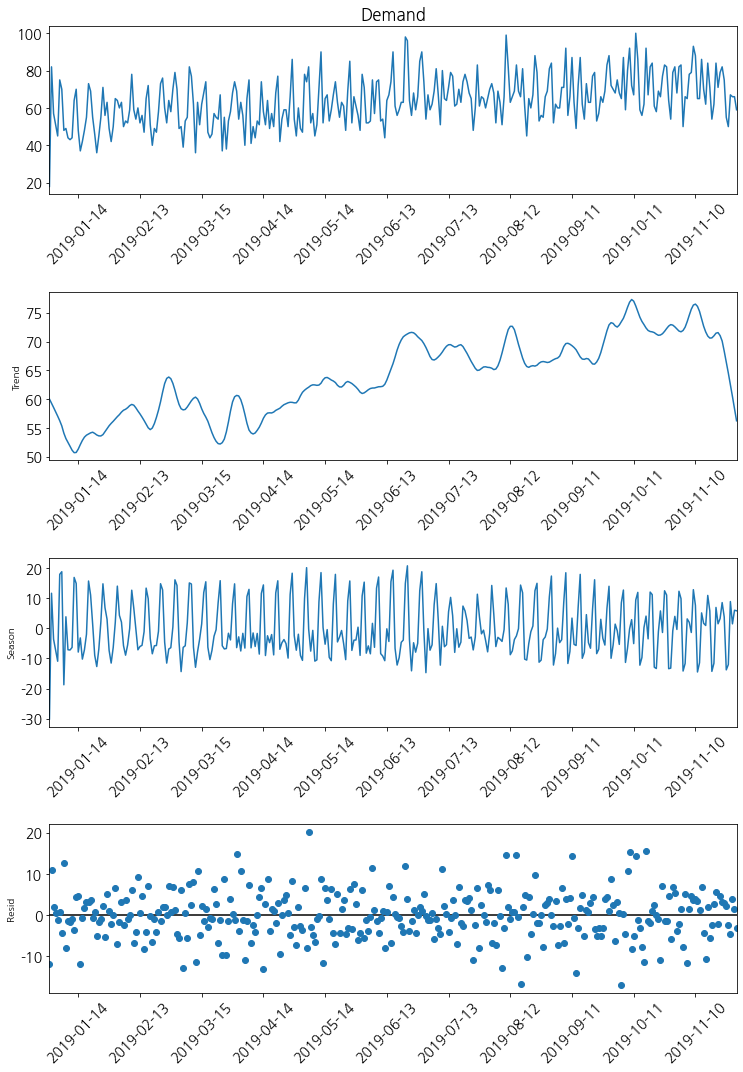

Date
2019-01-01    10.987766
2019-01-02     2.026916
2019-01-03     0.421563
2019-01-05     0.740682
2019-01-07    12.663454
                ...    
2019-11-23     3.305929
2019-11-24     2.836273
2019-11-25     2.320219
2019-11-28     4.010935
2019-11-29     1.581338
Name: resid, Length: 162, dtype: float64


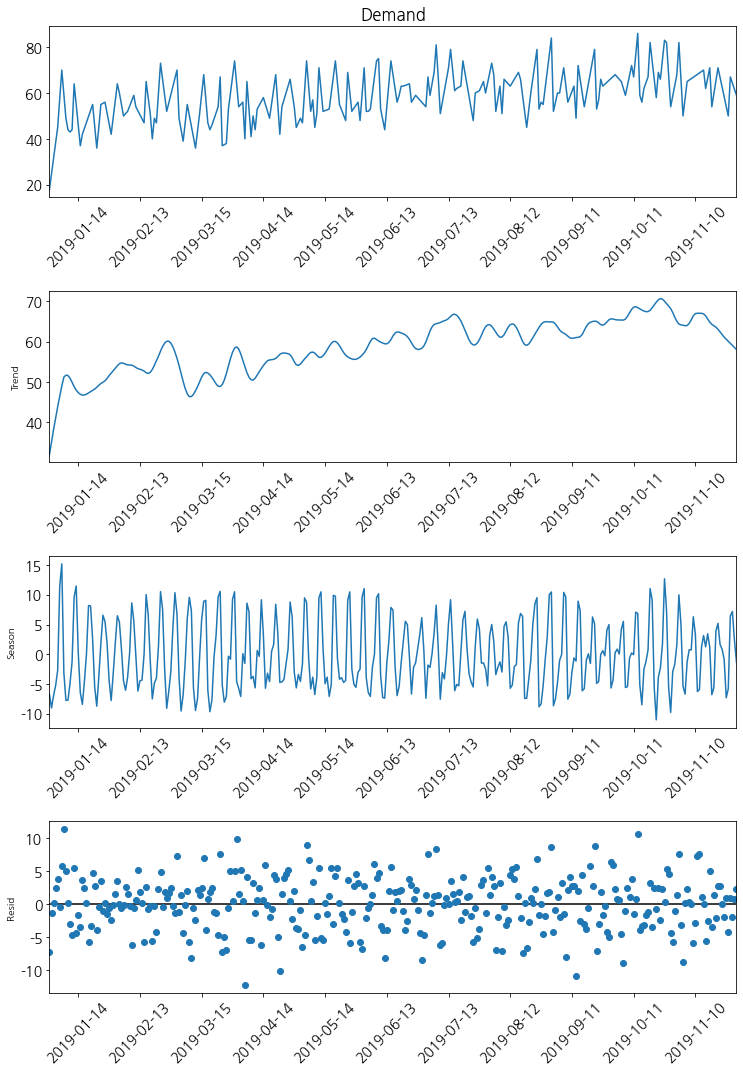

Date
2019-01-02     0.257027
2019-01-03     2.445540
2019-01-04     3.861747
2019-01-06     5.822572
2019-01-07    11.394488
                ...    
2019-11-22     2.742710
2019-11-25     0.908659
2019-11-27     1.016318
2019-11-29     0.763234
2019-11-30     2.315457
Name: resid, Length: 173, dtype: float64


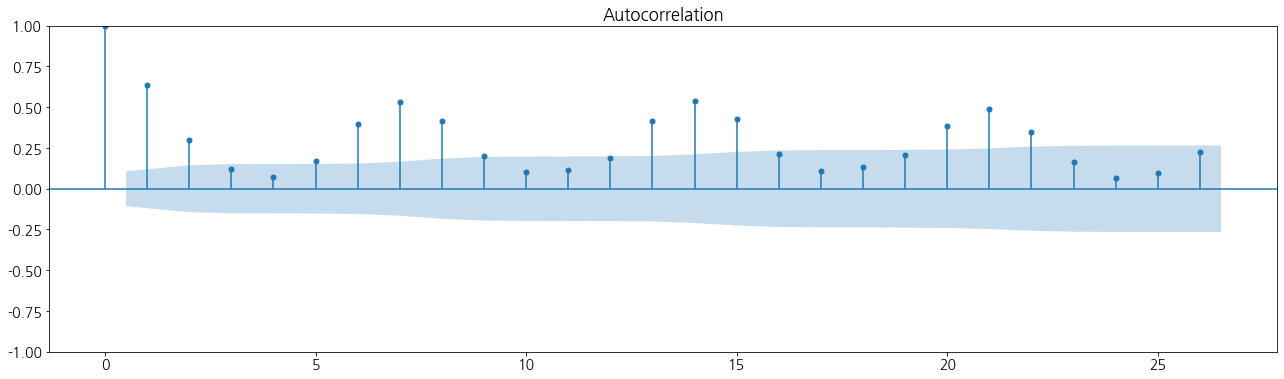

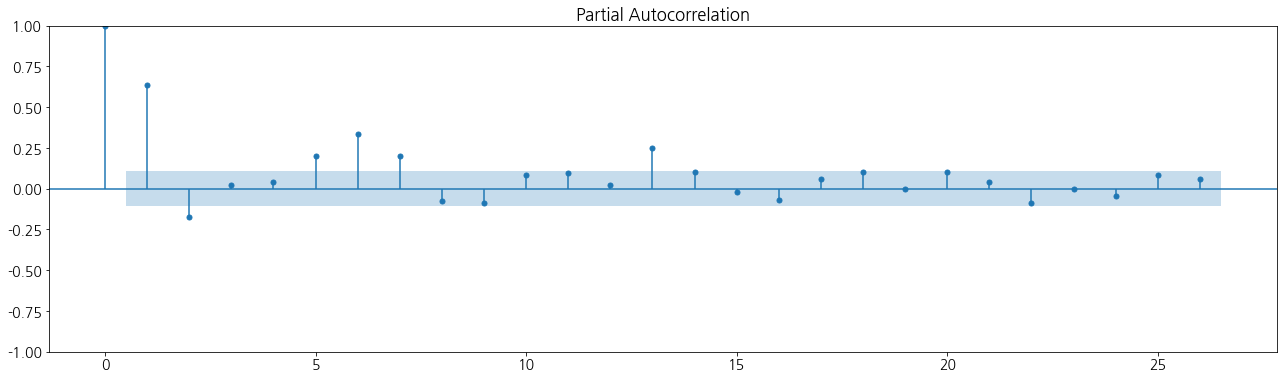

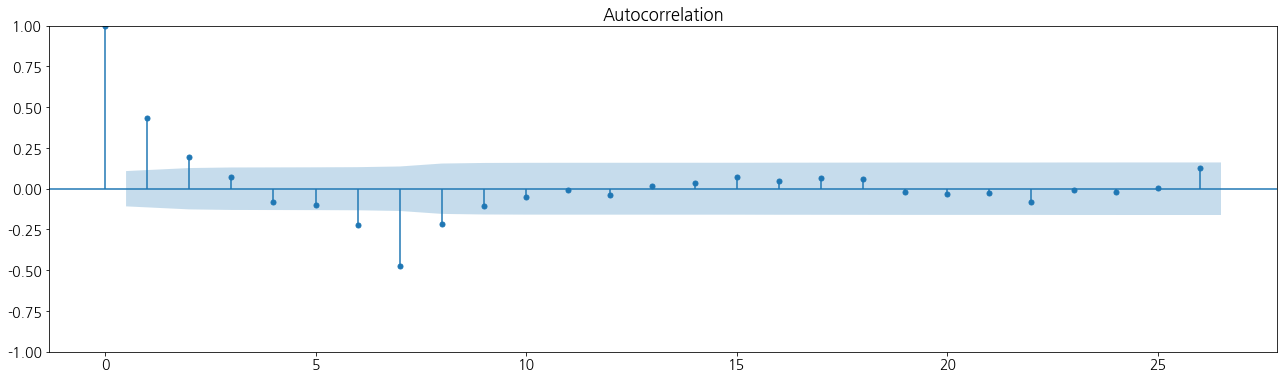

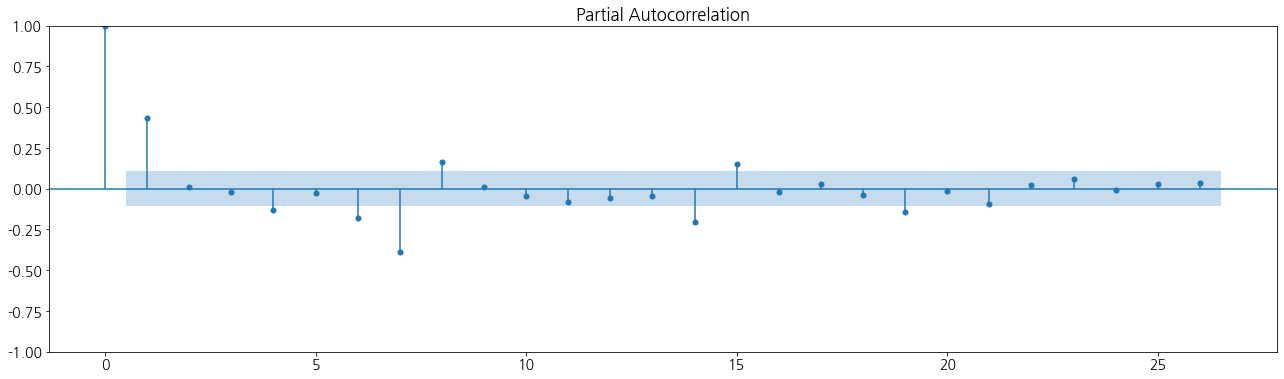

p-value of ADF test (diff 7): 6.91540535032466e-08


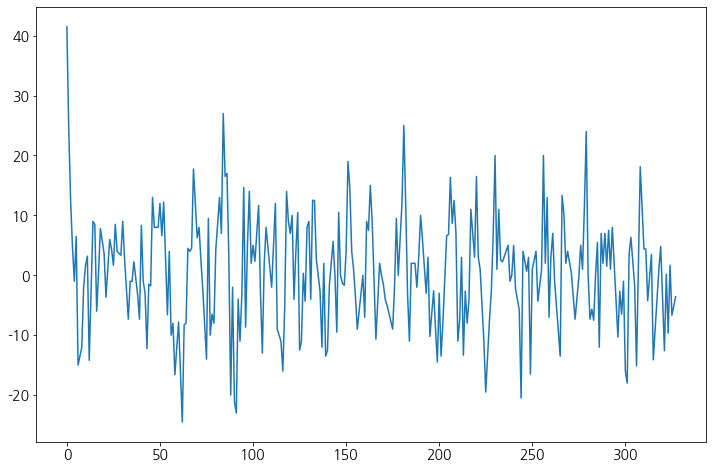

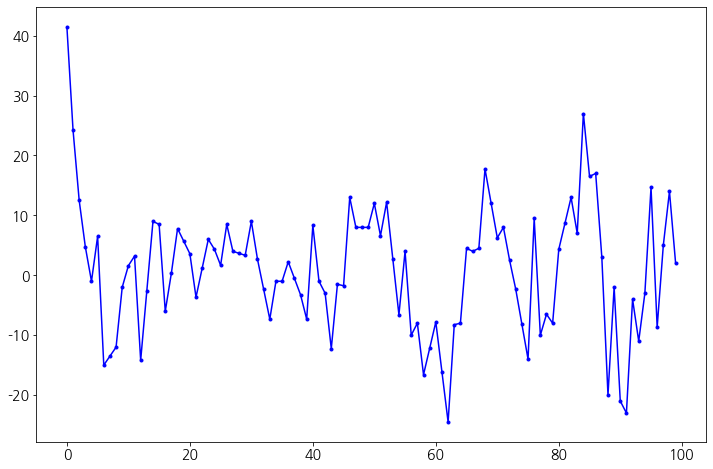

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                  244
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -870.409
Date:                Tue, 24 Jan 2023   AIC                           1750.818
Time:                        12:28:05   BIC                           1768.283
Sample:                    01-07-2019   HQIC                          1757.853
                         - 09-07-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6233      1.361     -0.458      0.647      -3.291       2.045
ar.L2         -0.2671      0.431     -0.619      0.536      -1.113       0.579
ar.L3         -0.0163      0.276     -0.059      0.9

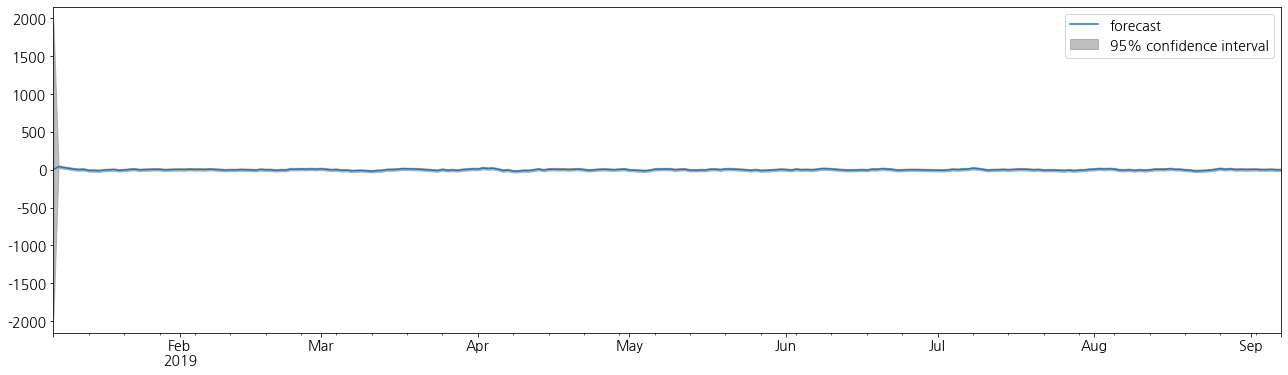

Test RMSE: 9.50170390710566



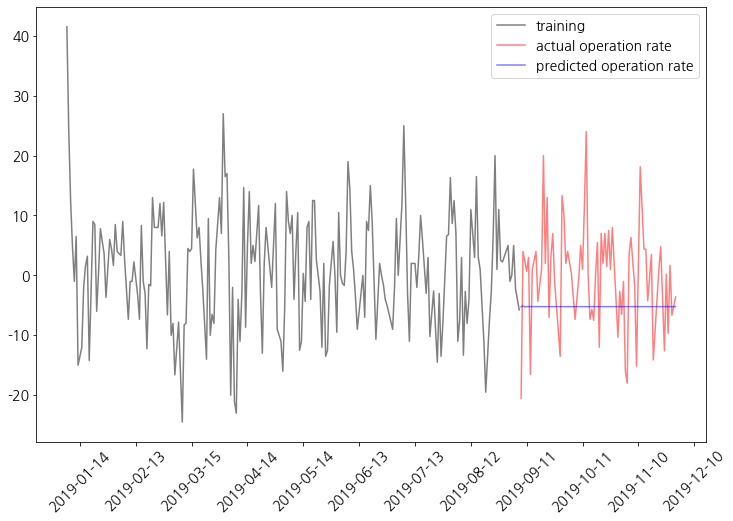





SARIMA
 ARIMA(1,0,0)(2,1,0)[7]          
[ 0.52562708 -1.0260286  -0.4989644  78.1331674 ]
1722.2508059816996
Test RMSE: 9.25857062012891



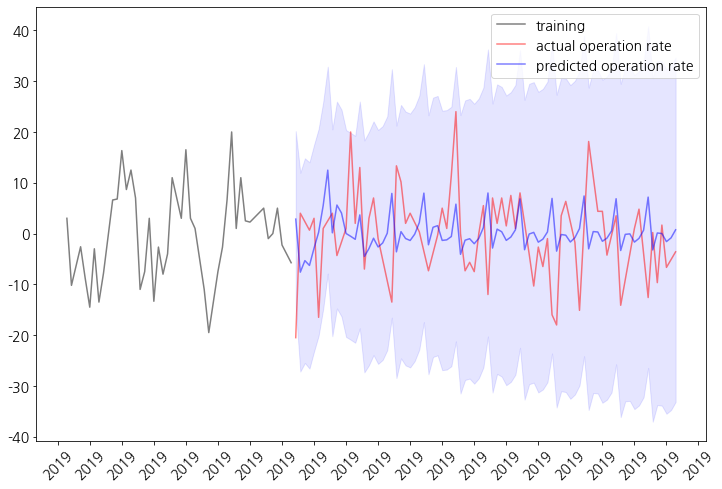

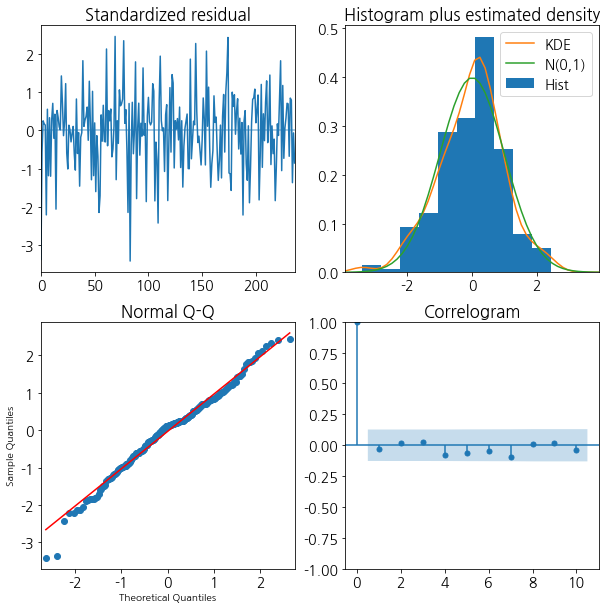

In [120]:
arima_sarima(car_df1)

In [121]:
outlier_df2 = outlier_df.drop(['region1','region2'],axis=1)

In [122]:
outlier_df2.head()

,reservation_return_at,reservation_start_at,age_group,gender,car_model,r_week_day,s_week_day,is_weekend,r_weeknum,r_year,...,s_month,s_yyyyww,date_term,index_int,reservation_return_hour3,reservation_return_date,reservation_start_date,reservation_return_hour,reservation_start_hour,term_normal
0,2019-07-19 00:53:41+00:00,2019-07-18 19:20:00+00:00,1,1,4,4,3,0,29,2019,...,2019-07,2019-29,5.56,0,00,2019-07-19,2019-07-18,2019-07-19 00:00,2019-07-18 19:00,0.017
1,2019-11-22 21:47:00+00:00,2019-11-22 05:00:00+00:00,3,1,1,4,4,0,47,2019,...,2019-11,2019-47,16.78,1,21,2019-11-22,2019-11-22,2019-11-22 21:00,2019-11-22 05:00,0.051
2,2019-10-19 19:50:00+00:00,2019-10-19 07:20:00+00:00,1,0,1,5,5,1,42,2019,...,2019-10,2019-42,12.50,2,19,2019-10-19,2019-10-19,2019-10-19 19:00,2019-10-19 07:00,0.038
3,2019-08-09 16:30:21+00:00,2019-08-09 12:40:00+00:00,3,0,1,4,4,0,32,2019,...,2019-08,2019-32,3.84,3,16,2019-08-09,2019-08-09,2019-08-09 16:00,2019-08-09 12:00,0.012
6,2019-06-08 21:15:54+00:00,2019-06-08 19:10:00+00:00,1,1,3,5,5,1,23,2019,...,2019-06,2019-23,2.10,6,21,2019-06-08,2019-06-08,2019-06-08 21:00,2019-06-08 19:00,0.006


ARIMA


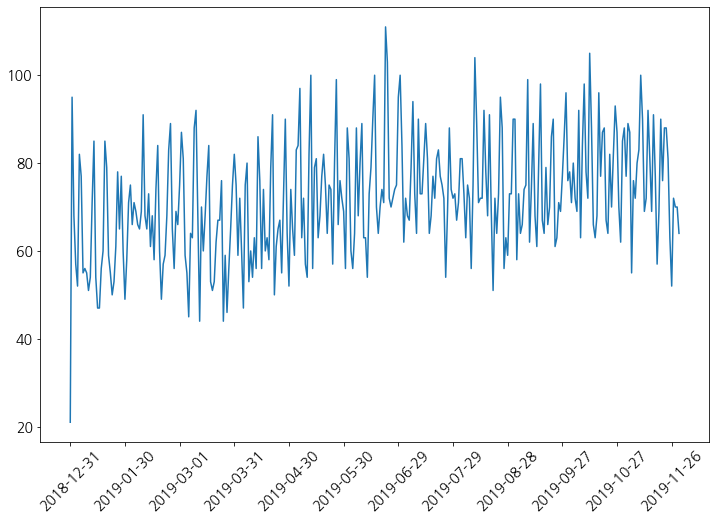

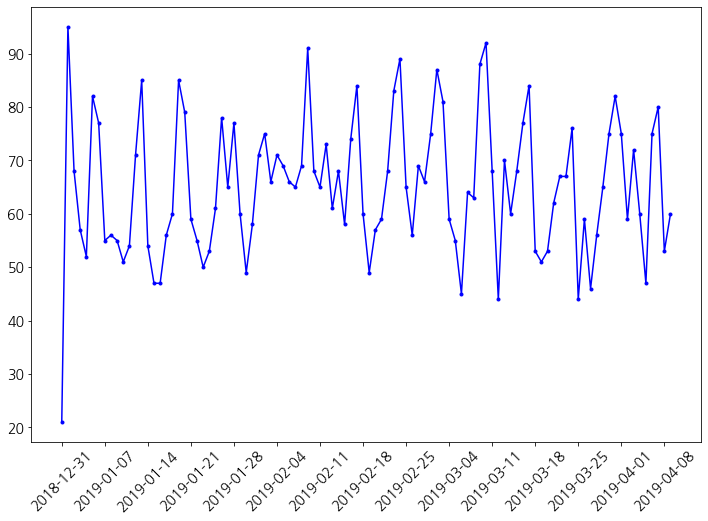

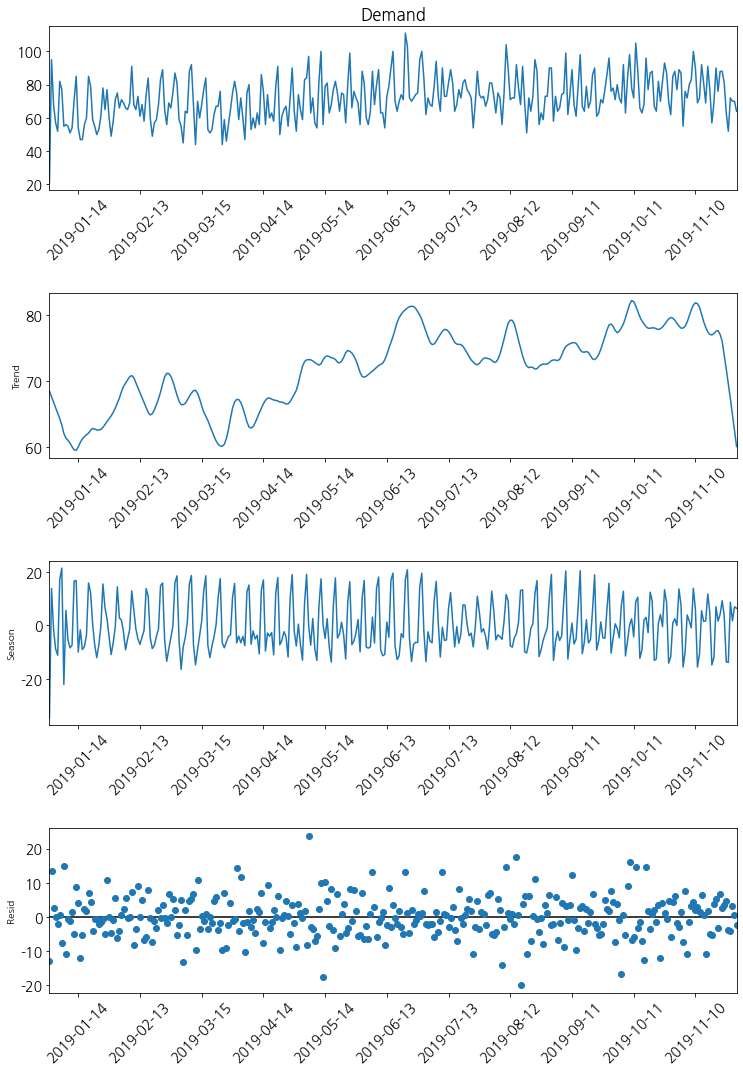

Date
2019-01-01    13.532088
2019-01-02     2.690426
2019-01-05     0.604913
2019-01-07    15.064962
2019-01-11     1.310986
                ...    
2019-11-23     2.674013
2019-11-24     3.376311
2019-11-25     4.805585
2019-11-28     3.325717
2019-11-29     0.476536
Name: resid, Length: 158, dtype: float64


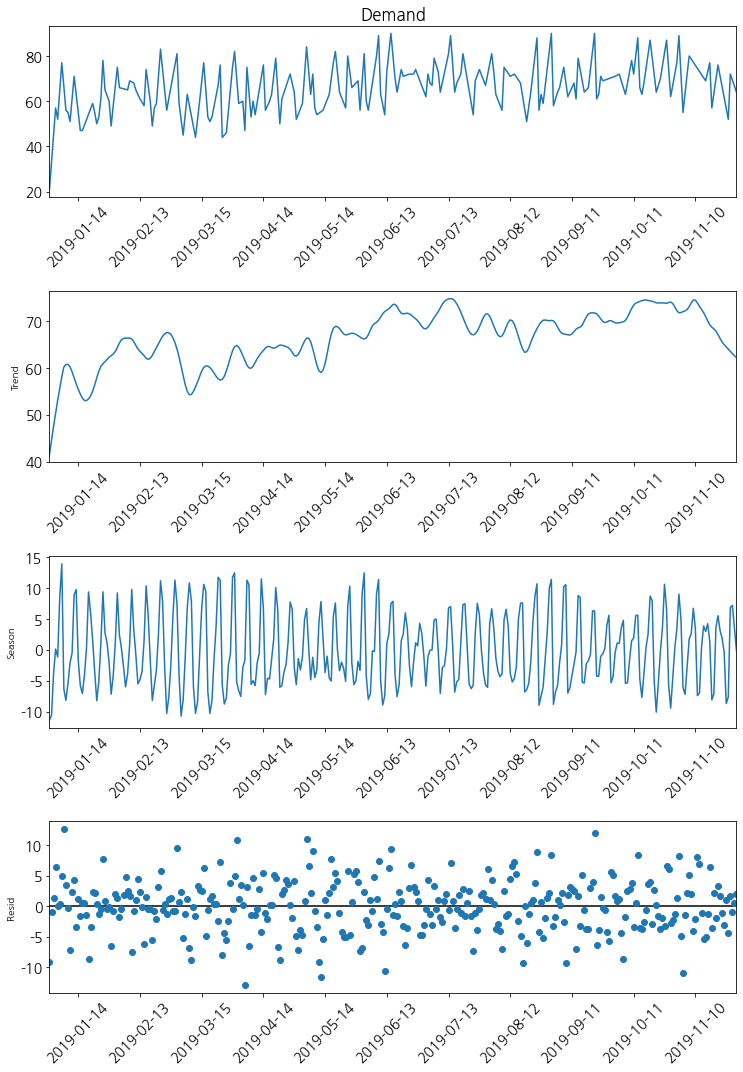

Date
2019-01-02     1.281475
2019-01-03     6.500175
2019-01-05     0.320003
2019-01-06     4.930232
2019-01-07    12.622401
                ...    
2019-11-22     1.745961
2019-11-25     0.983175
2019-11-27     1.617376
2019-11-29     0.606124
2019-11-30     1.963049
Name: resid, Length: 171, dtype: float64


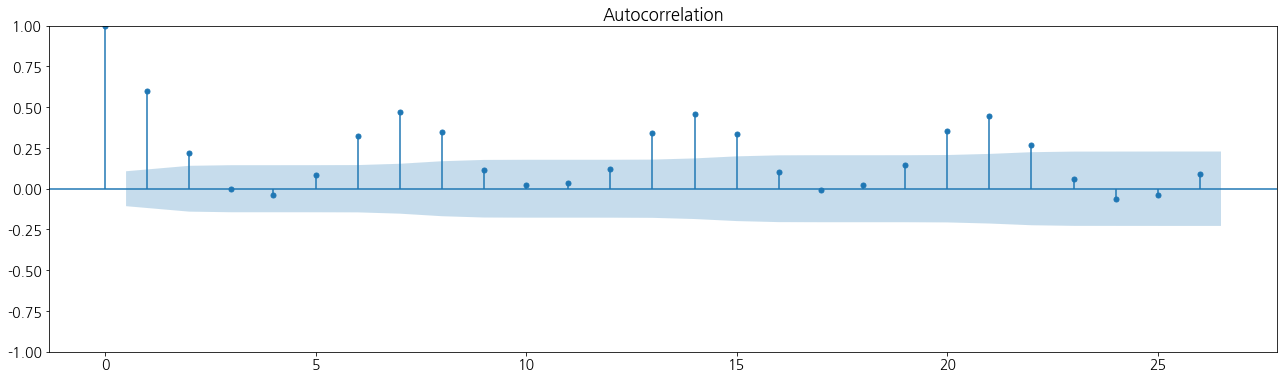

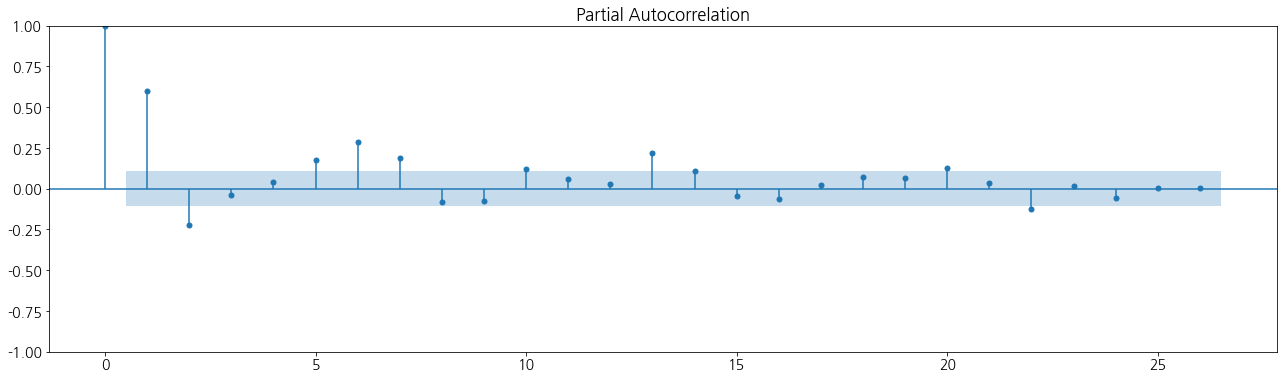

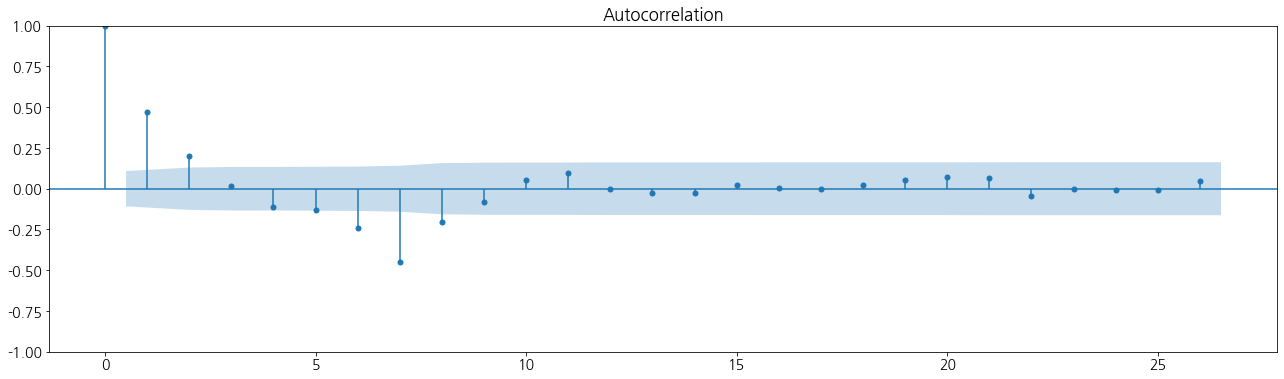

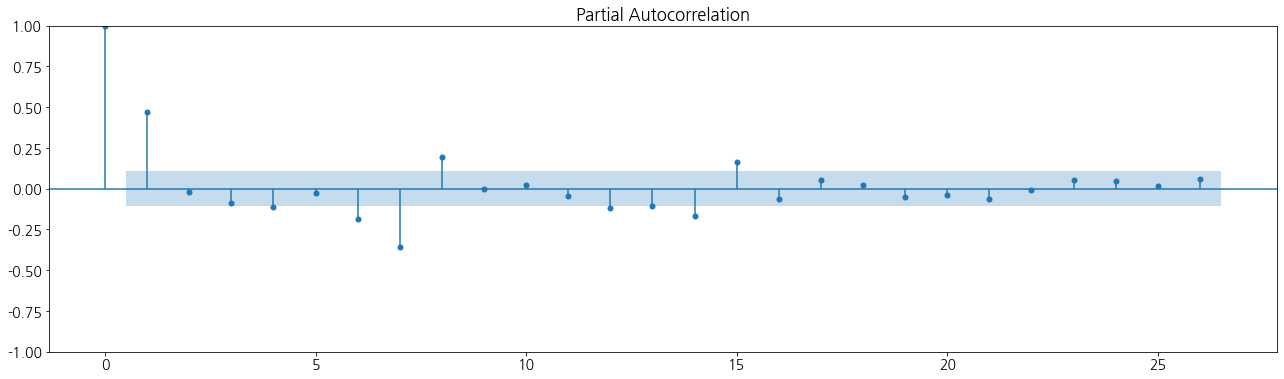

p-value of ADF test (diff 7): 2.435376918854945e-07


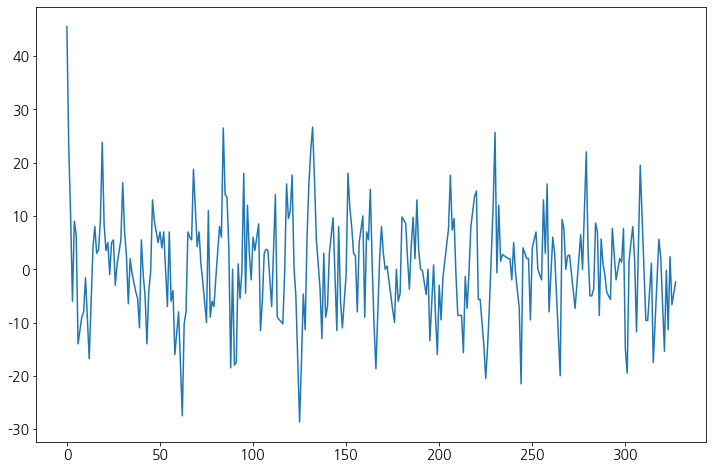

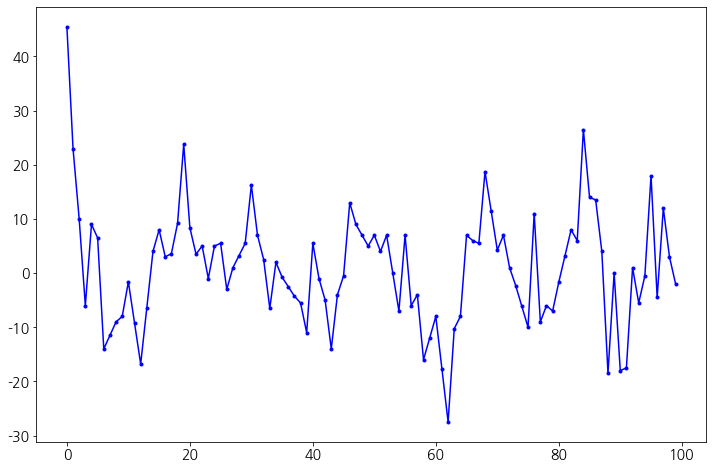

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                  244
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -863.809
Date:                Tue, 24 Jan 2023   AIC                           1737.617
Time:                        12:28:33   BIC                           1755.083
Sample:                    01-07-2019   HQIC                          1744.652
                         - 09-07-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5661      0.060      9.473      0.000       0.449       0.683
ar.L2          0.0782      0.076      1.030      0.303      -0.071       0.227
ar.L3         -0.1214      0.064     -1.906      0.0

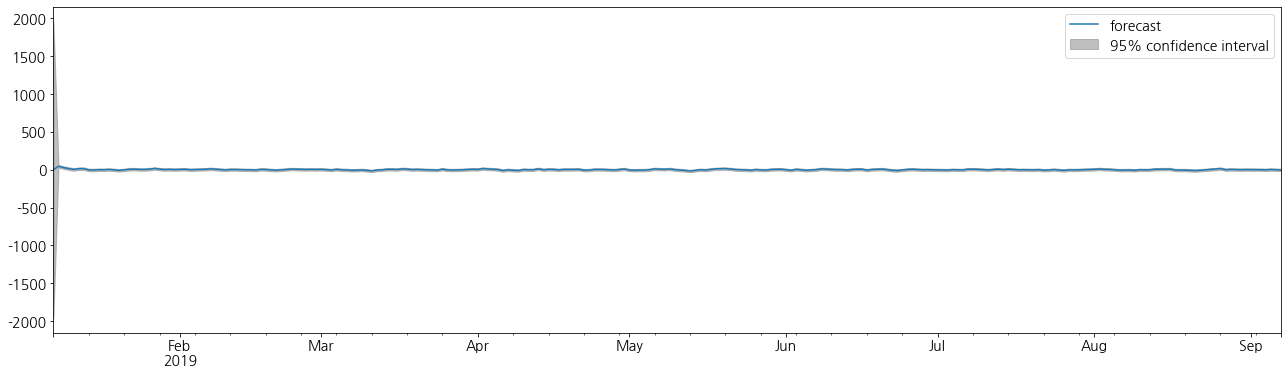

Test RMSE: 8.174859538413727



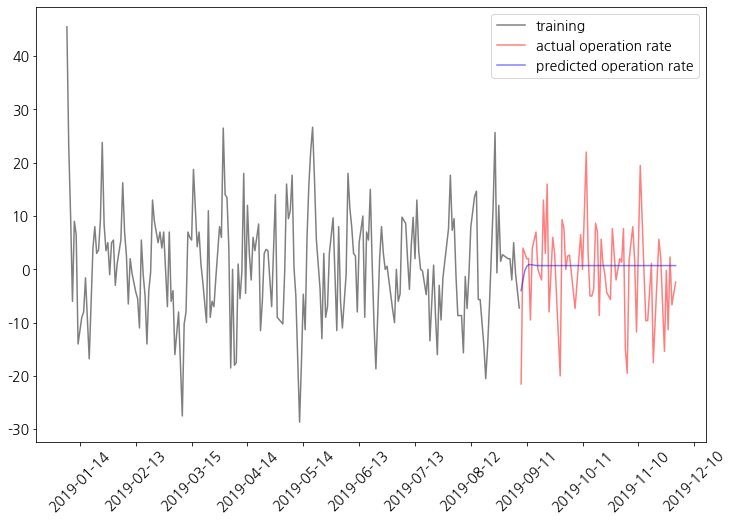





SARIMA
 ARIMA(2,0,1)(2,1,0)[7] intercept
[-1.23550158e-02  1.50747178e+00 -6.00096146e-01 -9.88119061e-01
 -9.72951197e-01 -5.23858001e-01  7.44988684e+01]
1725.179776690999
Test RMSE: 9.342579577329756



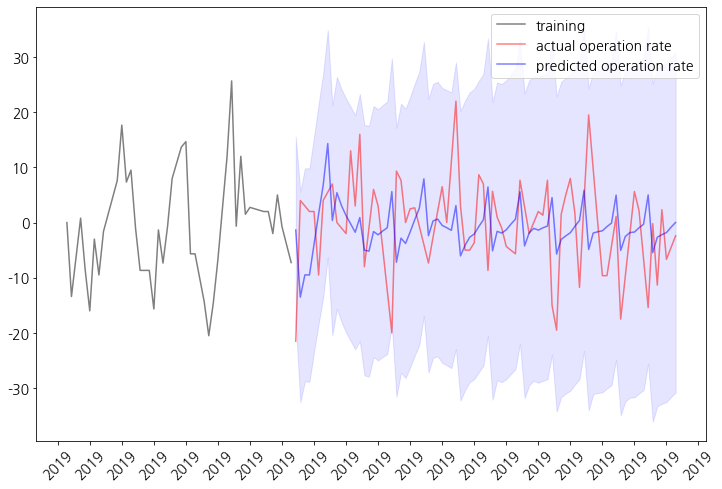

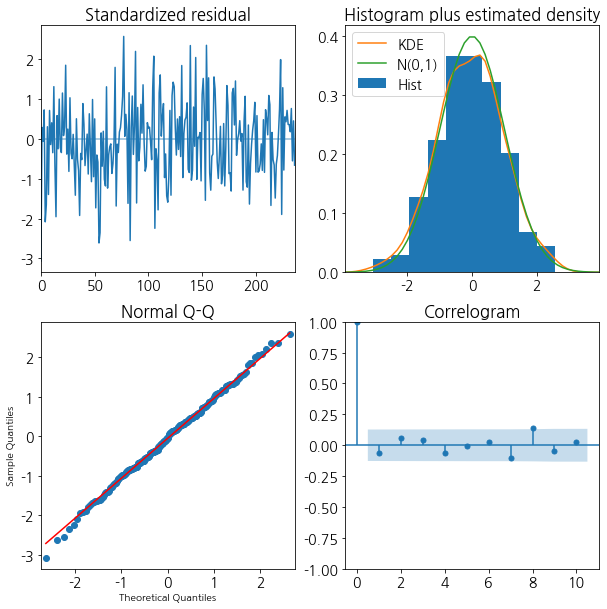

In [123]:
arima_sarima(outlier_df2)